# Exercizes on clustering

 Here you can find a program to read a data file in csv format. 
 The data file has the following heading:
    <number of samples>, <number of features>
    list of the names of the features (separated by comma)

The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.

In [1]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

dataset n. 1: n samples, n features
(150, 2)
dataset n. 2: n samples, n features
(6118, 2)
dataset n. 3: n samples, n features
(86558, 2)


The following program plots the dataset n.1

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

<Figure size 800x800 with 1 Axes>

The following is the program for plotting the dataset n.2

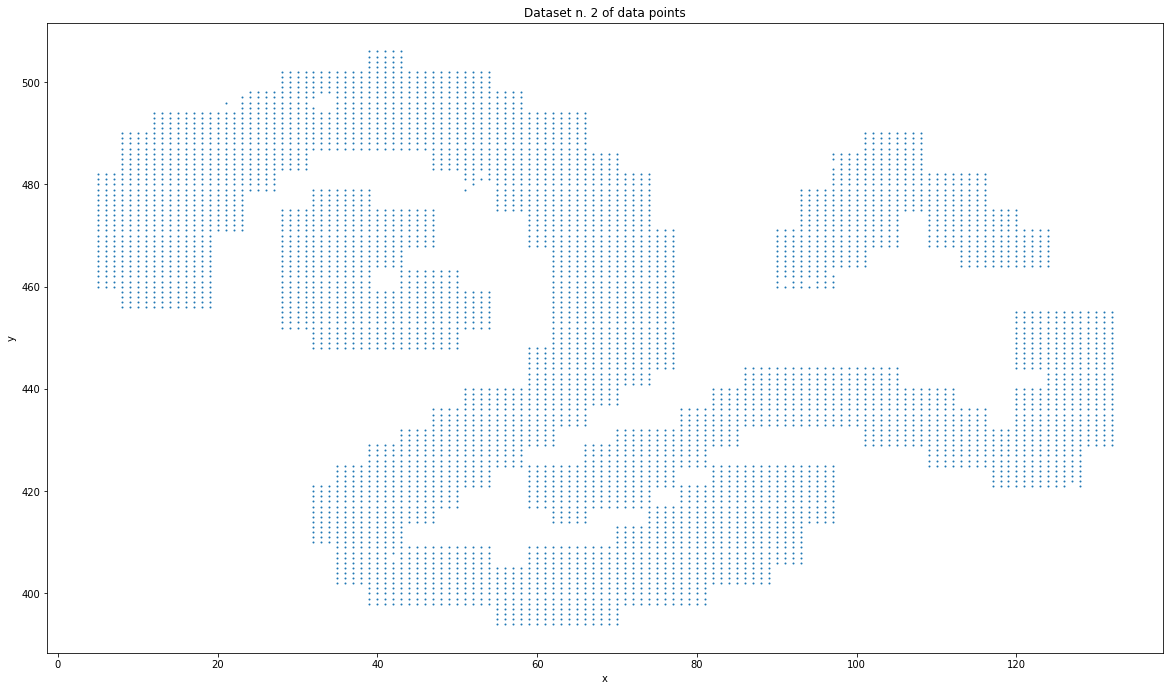

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

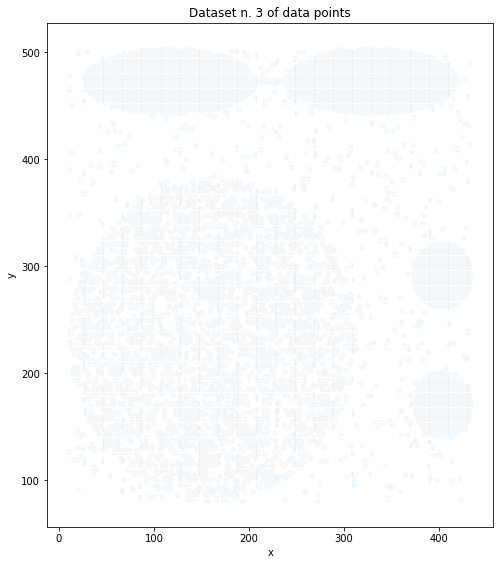

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=0.5, markeredgecolor = 'none')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
from sklearn.cluster import KMeans

np.random.seed(5)

#centers = [[50, 50], [100, 100], [140, 140]]

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

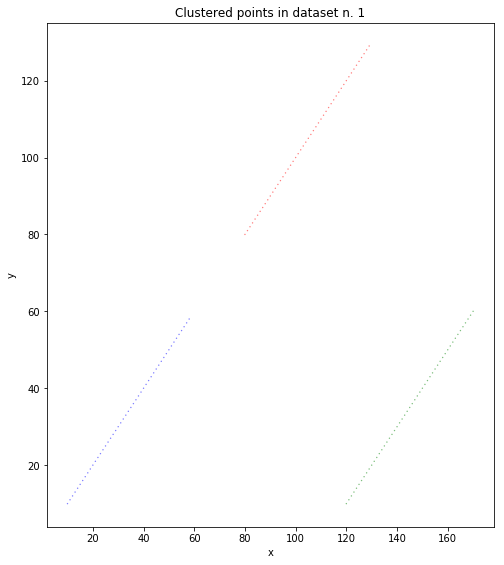

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

## In the following program we cluster the dataset n.2 with K-means. 

In [7]:
from sklearn.cluster import KMeans

# data2,feature_names2,n_samples2,n_features2

np.random.seed(5)
k = 4
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)
i = 0
for i in range(n_samples2):
    print("Example n."+str(i)+"=("+str(data2[i,0])+","+str(data2[i,1])+")")
    print("in cluster n."+str(kmeans2.labels_[i]))

Example n.0=(5.0,482.0)
in cluster n.1
Example n.1=(5.0,481.0)
in cluster n.1
Example n.2=(5.0,480.0)
in cluster n.1
Example n.3=(5.0,479.0)
in cluster n.1
Example n.4=(5.0,478.0)
in cluster n.1
Example n.5=(5.0,477.0)
in cluster n.1
Example n.6=(5.0,476.0)
in cluster n.1
Example n.7=(5.0,475.0)
in cluster n.1
Example n.8=(5.0,474.0)
in cluster n.1
Example n.9=(5.0,473.0)
in cluster n.1
Example n.10=(5.0,472.0)
in cluster n.1
Example n.11=(5.0,471.0)
in cluster n.1
Example n.12=(5.0,470.0)
in cluster n.1
Example n.13=(5.0,469.0)
in cluster n.1
Example n.14=(5.0,468.0)
in cluster n.1
Example n.15=(5.0,467.0)
in cluster n.1
Example n.16=(5.0,466.0)
in cluster n.1
Example n.17=(5.0,465.0)
in cluster n.1
Example n.18=(5.0,464.0)
in cluster n.1
Example n.19=(5.0,463.0)
in cluster n.1
Example n.20=(5.0,462.0)
in cluster n.1
Example n.21=(5.0,461.0)
in cluster n.1
Example n.22=(5.0,460.0)
in cluster n.1
Example n.23=(6.0,482.0)
in cluster n.1
Example n.24=(6.0,481.0)
in cluster n.1
Example n.

Example n.1319=(38.0,420.0)
in cluster n.2
Example n.1320=(38.0,419.0)
in cluster n.2
Example n.1321=(38.0,418.0)
in cluster n.2
Example n.1322=(38.0,417.0)
in cluster n.2
Example n.1323=(38.0,416.0)
in cluster n.2
Example n.1324=(38.0,415.0)
in cluster n.2
Example n.1325=(38.0,414.0)
in cluster n.2
Example n.1326=(38.0,413.0)
in cluster n.2
Example n.1327=(38.0,412.0)
in cluster n.2
Example n.1328=(38.0,411.0)
in cluster n.2
Example n.1329=(38.0,410.0)
in cluster n.2
Example n.1330=(38.0,409.0)
in cluster n.2
Example n.1331=(38.0,408.0)
in cluster n.2
Example n.1332=(38.0,407.0)
in cluster n.2
Example n.1333=(38.0,406.0)
in cluster n.2
Example n.1334=(38.0,405.0)
in cluster n.2
Example n.1335=(38.0,404.0)
in cluster n.2
Example n.1336=(38.0,403.0)
in cluster n.2
Example n.1337=(38.0,402.0)
in cluster n.2
Example n.1338=(39.0,506.0)
in cluster n.1
Example n.1339=(39.0,505.0)
in cluster n.1
Example n.1340=(39.0,504.0)
in cluster n.1
Example n.1341=(39.0,503.0)
in cluster n.1
Example n.1

in cluster n.3
Example n.2530=(56.0,497.0)
in cluster n.3
Example n.2531=(56.0,496.0)
in cluster n.3
Example n.2532=(56.0,495.0)
in cluster n.3
Example n.2533=(56.0,494.0)
in cluster n.3
Example n.2534=(56.0,493.0)
in cluster n.3
Example n.2535=(56.0,492.0)
in cluster n.3
Example n.2536=(56.0,491.0)
in cluster n.3
Example n.2537=(56.0,490.0)
in cluster n.3
Example n.2538=(56.0,489.0)
in cluster n.3
Example n.2539=(56.0,488.0)
in cluster n.3
Example n.2540=(56.0,487.0)
in cluster n.3
Example n.2541=(56.0,486.0)
in cluster n.3
Example n.2542=(56.0,485.0)
in cluster n.3
Example n.2543=(56.0,484.0)
in cluster n.3
Example n.2544=(56.0,483.0)
in cluster n.3
Example n.2545=(56.0,482.0)
in cluster n.3
Example n.2546=(56.0,481.0)
in cluster n.3
Example n.2547=(56.0,480.0)
in cluster n.3
Example n.2548=(56.0,479.0)
in cluster n.3
Example n.2549=(56.0,478.0)
in cluster n.3
Example n.2550=(56.0,477.0)
in cluster n.3
Example n.2551=(56.0,476.0)
in cluster n.3
Example n.2552=(56.0,475.0)
in cluster 

Example n.3787=(72.0,451.0)
in cluster n.3
Example n.3788=(72.0,450.0)
in cluster n.3
Example n.3789=(72.0,449.0)
in cluster n.3
Example n.3790=(72.0,448.0)
in cluster n.3
Example n.3791=(72.0,447.0)
in cluster n.3
Example n.3792=(72.0,446.0)
in cluster n.3
Example n.3793=(72.0,445.0)
in cluster n.3
Example n.3794=(72.0,444.0)
in cluster n.3
Example n.3795=(72.0,443.0)
in cluster n.3
Example n.3796=(72.0,442.0)
in cluster n.2
Example n.3797=(72.0,441.0)
in cluster n.2
Example n.3798=(72.0,432.0)
in cluster n.2
Example n.3799=(72.0,431.0)
in cluster n.2
Example n.3800=(72.0,430.0)
in cluster n.2
Example n.3801=(72.0,429.0)
in cluster n.2
Example n.3802=(72.0,428.0)
in cluster n.2
Example n.3803=(72.0,427.0)
in cluster n.2
Example n.3804=(72.0,426.0)
in cluster n.2
Example n.3805=(72.0,425.0)
in cluster n.2
Example n.3806=(72.0,424.0)
in cluster n.2
Example n.3807=(72.0,423.0)
in cluster n.2
Example n.3808=(72.0,422.0)
in cluster n.2
Example n.3809=(72.0,421.0)
in cluster n.2
Example n.3

in cluster n.0
Example n.5069=(101.0,482.0)
in cluster n.0
Example n.5070=(101.0,481.0)
in cluster n.0
Example n.5071=(101.0,480.0)
in cluster n.0
Example n.5072=(101.0,479.0)
in cluster n.0
Example n.5073=(101.0,478.0)
in cluster n.0
Example n.5074=(101.0,477.0)
in cluster n.0
Example n.5075=(101.0,476.0)
in cluster n.0
Example n.5076=(101.0,475.0)
in cluster n.0
Example n.5077=(101.0,474.0)
in cluster n.0
Example n.5078=(101.0,473.0)
in cluster n.0
Example n.5079=(101.0,472.0)
in cluster n.0
Example n.5080=(101.0,471.0)
in cluster n.0
Example n.5081=(101.0,470.0)
in cluster n.0
Example n.5082=(101.0,469.0)
in cluster n.0
Example n.5083=(101.0,468.0)
in cluster n.0
Example n.5084=(101.0,467.0)
in cluster n.0
Example n.5085=(101.0,466.0)
in cluster n.0
Example n.5086=(101.0,465.0)
in cluster n.0
Example n.5087=(101.0,464.0)
in cluster n.0
Example n.5088=(101.0,444.0)
in cluster n.0
Example n.5089=(101.0,443.0)
in cluster n.0
Example n.5090=(101.0,442.0)
in cluster n.0
Example n.5091=(1

In the following program we plot the clusters

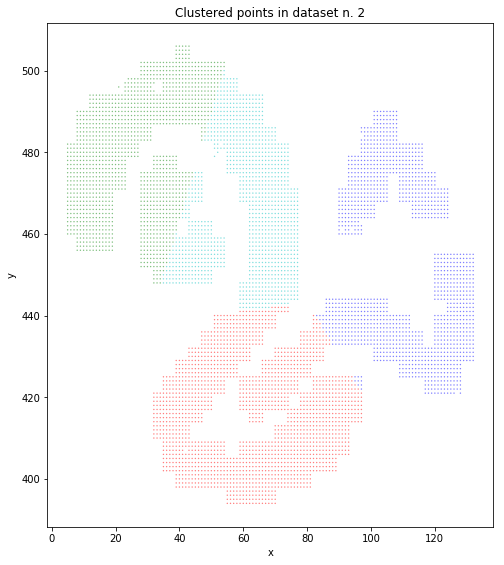

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

## In the following program we cluster the dataset n.3 with K-means. 

In [9]:
from sklearn.cluster import KMeans

# data3,feature_names3,n_samples3,n_features3

np.random.seed(5)
k = 4
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)
i = 0
for i in range(n_samples3):
    print("Example n."+str(i)+"=("+str(data3[i,0])+","+str(data3[i,1])+")")
    print("in cluster n."+str(kmeans3.labels_[i]))

Example n.0=(9.0,480.0)
in cluster n.3
Example n.1=(9.0,479.0)
in cluster n.3
Example n.2=(9.0,478.0)
in cluster n.3
Example n.3=(9.0,477.0)
in cluster n.3
Example n.4=(9.0,467.0)
in cluster n.3
Example n.5=(9.0,466.0)
in cluster n.3
Example n.6=(9.0,465.0)
in cluster n.3
Example n.7=(9.0,464.0)
in cluster n.3
Example n.8=(9.0,392.0)
in cluster n.3
Example n.9=(9.0,391.0)
in cluster n.3
Example n.10=(9.0,390.0)
in cluster n.3
Example n.11=(9.0,350.0)
in cluster n.3
Example n.12=(9.0,349.0)
in cluster n.3
Example n.13=(9.0,348.0)
in cluster n.3
Example n.14=(9.0,347.0)
in cluster n.3
Example n.15=(9.0,290.0)
in cluster n.1
Example n.16=(9.0,289.0)
in cluster n.1
Example n.17=(9.0,288.0)
in cluster n.1
Example n.18=(9.0,287.0)
in cluster n.1
Example n.19=(9.0,240.0)
in cluster n.1
Example n.20=(9.0,239.0)
in cluster n.1
Example n.21=(9.0,238.0)
in cluster n.1
Example n.22=(9.0,231.0)
in cluster n.1
Example n.23=(9.0,230.0)
in cluster n.1
Example n.24=(9.0,229.0)
in cluster n.1
Example n.

Example n.1443=(24.0,142.0)
in cluster n.1
Example n.1444=(24.0,141.0)
in cluster n.1
Example n.1445=(24.0,140.0)
in cluster n.1
Example n.1446=(24.0,131.0)
in cluster n.1
Example n.1447=(24.0,130.0)
in cluster n.1
Example n.1448=(24.0,129.0)
in cluster n.1
Example n.1449=(24.0,128.0)
in cluster n.1
Example n.1450=(24.0,127.0)
in cluster n.1
Example n.1451=(24.0,126.0)
in cluster n.1
Example n.1452=(24.0,125.0)
in cluster n.1
Example n.1453=(24.0,124.0)
in cluster n.1
Example n.1454=(24.0,123.0)
in cluster n.1
Example n.1455=(24.0,122.0)
in cluster n.1
Example n.1456=(24.0,120.0)
in cluster n.1
Example n.1457=(24.0,117.0)
in cluster n.1
Example n.1458=(24.0,116.0)
in cluster n.1
Example n.1459=(25.0,478.0)
in cluster n.3
Example n.1460=(25.0,477.0)
in cluster n.3
Example n.1461=(25.0,476.0)
in cluster n.3
Example n.1462=(25.0,475.0)
in cluster n.3
Example n.1463=(25.0,474.0)
in cluster n.3
Example n.1464=(25.0,473.0)
in cluster n.3
Example n.1465=(25.0,472.0)
in cluster n.3
Example n.1

Example n.2693=(32.0,167.0)
in cluster n.1
Example n.2694=(32.0,166.0)
in cluster n.1
Example n.2695=(32.0,165.0)
in cluster n.1
Example n.2696=(32.0,164.0)
in cluster n.1
Example n.2697=(32.0,163.0)
in cluster n.1
Example n.2698=(32.0,162.0)
in cluster n.1
Example n.2699=(32.0,161.0)
in cluster n.1
Example n.2700=(32.0,160.0)
in cluster n.1
Example n.2701=(32.0,159.0)
in cluster n.1
Example n.2702=(32.0,158.0)
in cluster n.1
Example n.2703=(32.0,157.0)
in cluster n.1
Example n.2704=(32.0,156.0)
in cluster n.1
Example n.2705=(32.0,155.0)
in cluster n.1
Example n.2706=(32.0,154.0)
in cluster n.1
Example n.2707=(32.0,153.0)
in cluster n.1
Example n.2708=(32.0,136.0)
in cluster n.1
Example n.2709=(32.0,135.0)
in cluster n.1
Example n.2710=(32.0,134.0)
in cluster n.1
Example n.2711=(32.0,133.0)
in cluster n.1
Example n.2712=(32.0,132.0)
in cluster n.1
Example n.2713=(32.0,131.0)
in cluster n.1
Example n.2714=(32.0,130.0)
in cluster n.1
Example n.2715=(32.0,129.0)
in cluster n.1
Example n.2

in cluster n.1
Example n.3943=(39.0,113.0)
in cluster n.1
Example n.3944=(39.0,112.0)
in cluster n.1
Example n.3945=(39.0,111.0)
in cluster n.1
Example n.3946=(39.0,110.0)
in cluster n.1
Example n.3947=(39.0,109.0)
in cluster n.1
Example n.3948=(40.0,492.0)
in cluster n.3
Example n.3949=(40.0,491.0)
in cluster n.3
Example n.3950=(40.0,490.0)
in cluster n.3
Example n.3951=(40.0,489.0)
in cluster n.3
Example n.3952=(40.0,488.0)
in cluster n.3
Example n.3953=(40.0,487.0)
in cluster n.3
Example n.3954=(40.0,486.0)
in cluster n.3
Example n.3955=(40.0,485.0)
in cluster n.3
Example n.3956=(40.0,484.0)
in cluster n.3
Example n.3957=(40.0,483.0)
in cluster n.3
Example n.3958=(40.0,482.0)
in cluster n.3
Example n.3959=(40.0,481.0)
in cluster n.3
Example n.3960=(40.0,480.0)
in cluster n.3
Example n.3961=(40.0,479.0)
in cluster n.3
Example n.3962=(40.0,478.0)
in cluster n.3
Example n.3963=(40.0,477.0)
in cluster n.3
Example n.3964=(40.0,476.0)
in cluster n.3
Example n.3965=(40.0,475.0)
in cluster 

Example n.5224=(46.0,321.0)
in cluster n.3
Example n.5225=(46.0,320.0)
in cluster n.3
Example n.5226=(46.0,319.0)
in cluster n.3
Example n.5227=(46.0,318.0)
in cluster n.3
Example n.5228=(46.0,317.0)
in cluster n.3
Example n.5229=(46.0,316.0)
in cluster n.3
Example n.5230=(46.0,315.0)
in cluster n.3
Example n.5231=(46.0,314.0)
in cluster n.3
Example n.5232=(46.0,313.0)
in cluster n.3
Example n.5233=(46.0,312.0)
in cluster n.3
Example n.5234=(46.0,311.0)
in cluster n.3
Example n.5235=(46.0,310.0)
in cluster n.3
Example n.5236=(46.0,309.0)
in cluster n.3
Example n.5237=(46.0,308.0)
in cluster n.3
Example n.5238=(46.0,307.0)
in cluster n.3
Example n.5239=(46.0,306.0)
in cluster n.3
Example n.5240=(46.0,305.0)
in cluster n.3
Example n.5241=(46.0,304.0)
in cluster n.3
Example n.5242=(46.0,303.0)
in cluster n.3
Example n.5243=(46.0,302.0)
in cluster n.3
Example n.5244=(46.0,301.0)
in cluster n.3
Example n.5245=(46.0,300.0)
in cluster n.1
Example n.5246=(46.0,299.0)
in cluster n.1
Example n.5

Example n.6692=(53.0,237.0)
in cluster n.1
Example n.6693=(53.0,236.0)
in cluster n.1
Example n.6694=(53.0,235.0)
in cluster n.1
Example n.6695=(53.0,234.0)
in cluster n.1
Example n.6696=(53.0,233.0)
in cluster n.1
Example n.6697=(53.0,232.0)
in cluster n.1
Example n.6698=(53.0,231.0)
in cluster n.1
Example n.6699=(53.0,230.0)
in cluster n.1
Example n.6700=(53.0,229.0)
in cluster n.1
Example n.6701=(53.0,228.0)
in cluster n.1
Example n.6702=(53.0,227.0)
in cluster n.1
Example n.6703=(53.0,226.0)
in cluster n.1
Example n.6704=(53.0,225.0)
in cluster n.1
Example n.6705=(53.0,224.0)
in cluster n.1
Example n.6706=(53.0,213.0)
in cluster n.1
Example n.6707=(53.0,212.0)
in cluster n.1
Example n.6708=(53.0,211.0)
in cluster n.1
Example n.6709=(53.0,210.0)
in cluster n.1
Example n.6710=(53.0,206.0)
in cluster n.1
Example n.6711=(53.0,205.0)
in cluster n.1
Example n.6712=(53.0,204.0)
in cluster n.1
Example n.6713=(53.0,203.0)
in cluster n.1
Example n.6714=(53.0,202.0)
in cluster n.1
Example n.6

Example n.8044=(59.0,316.0)
in cluster n.3
Example n.8045=(59.0,315.0)
in cluster n.3
Example n.8046=(59.0,314.0)
in cluster n.3
Example n.8047=(59.0,313.0)
in cluster n.3
Example n.8048=(59.0,312.0)
in cluster n.3
Example n.8049=(59.0,308.0)
in cluster n.3
Example n.8050=(59.0,307.0)
in cluster n.3
Example n.8051=(59.0,306.0)
in cluster n.3
Example n.8052=(59.0,305.0)
in cluster n.3
Example n.8053=(59.0,304.0)
in cluster n.3
Example n.8054=(59.0,303.0)
in cluster n.3
Example n.8055=(59.0,299.0)
in cluster n.1
Example n.8056=(59.0,298.0)
in cluster n.1
Example n.8057=(59.0,297.0)
in cluster n.1
Example n.8058=(59.0,296.0)
in cluster n.1
Example n.8059=(59.0,295.0)
in cluster n.1
Example n.8060=(59.0,294.0)
in cluster n.1
Example n.8061=(59.0,293.0)
in cluster n.1
Example n.8062=(59.0,292.0)
in cluster n.1
Example n.8063=(59.0,291.0)
in cluster n.1
Example n.8064=(59.0,290.0)
in cluster n.1
Example n.8065=(59.0,289.0)
in cluster n.1
Example n.8066=(59.0,288.0)
in cluster n.1
Example n.8

in cluster n.1
Example n.9442=(65.0,205.0)
in cluster n.1
Example n.9443=(65.0,204.0)
in cluster n.1
Example n.9444=(65.0,203.0)
in cluster n.1
Example n.9445=(65.0,202.0)
in cluster n.1
Example n.9446=(65.0,201.0)
in cluster n.1
Example n.9447=(65.0,199.0)
in cluster n.1
Example n.9448=(65.0,198.0)
in cluster n.1
Example n.9449=(65.0,197.0)
in cluster n.1
Example n.9450=(65.0,196.0)
in cluster n.1
Example n.9451=(65.0,193.0)
in cluster n.1
Example n.9452=(65.0,192.0)
in cluster n.1
Example n.9453=(65.0,191.0)
in cluster n.1
Example n.9454=(65.0,190.0)
in cluster n.1
Example n.9455=(65.0,189.0)
in cluster n.1
Example n.9456=(65.0,188.0)
in cluster n.1
Example n.9457=(65.0,187.0)
in cluster n.1
Example n.9458=(65.0,186.0)
in cluster n.1
Example n.9459=(65.0,185.0)
in cluster n.1
Example n.9460=(65.0,184.0)
in cluster n.1
Example n.9461=(65.0,183.0)
in cluster n.1
Example n.9462=(65.0,182.0)
in cluster n.1
Example n.9463=(65.0,181.0)
in cluster n.1
Example n.9464=(65.0,180.0)
in cluster 

in cluster n.1
Example n.10855=(71.0,164.0)
in cluster n.1
Example n.10856=(71.0,157.0)
in cluster n.1
Example n.10857=(71.0,156.0)
in cluster n.1
Example n.10858=(71.0,155.0)
in cluster n.1
Example n.10859=(71.0,154.0)
in cluster n.1
Example n.10860=(71.0,153.0)
in cluster n.1
Example n.10861=(71.0,152.0)
in cluster n.1
Example n.10862=(71.0,151.0)
in cluster n.1
Example n.10863=(71.0,148.0)
in cluster n.1
Example n.10864=(71.0,147.0)
in cluster n.1
Example n.10865=(71.0,146.0)
in cluster n.1
Example n.10866=(71.0,145.0)
in cluster n.1
Example n.10867=(71.0,144.0)
in cluster n.1
Example n.10868=(71.0,143.0)
in cluster n.1
Example n.10869=(71.0,142.0)
in cluster n.1
Example n.10870=(71.0,141.0)
in cluster n.1
Example n.10871=(71.0,131.0)
in cluster n.1
Example n.10872=(71.0,130.0)
in cluster n.1
Example n.10873=(71.0,129.0)
in cluster n.1
Example n.10874=(71.0,128.0)
in cluster n.1
Example n.10875=(71.0,127.0)
in cluster n.1
Example n.10876=(71.0,126.0)
in cluster n.1
Example n.10877=(

Example n.12191=(77.0,343.0)
in cluster n.3
Example n.12192=(77.0,342.0)
in cluster n.3
Example n.12193=(77.0,341.0)
in cluster n.3
Example n.12194=(77.0,340.0)
in cluster n.3
Example n.12195=(77.0,339.0)
in cluster n.3
Example n.12196=(77.0,338.0)
in cluster n.3
Example n.12197=(77.0,337.0)
in cluster n.3
Example n.12198=(77.0,309.0)
in cluster n.3
Example n.12199=(77.0,308.0)
in cluster n.3
Example n.12200=(77.0,307.0)
in cluster n.3
Example n.12201=(77.0,306.0)
in cluster n.3
Example n.12202=(77.0,305.0)
in cluster n.3
Example n.12203=(77.0,304.0)
in cluster n.3
Example n.12204=(77.0,303.0)
in cluster n.3
Example n.12205=(77.0,302.0)
in cluster n.3
Example n.12206=(77.0,298.0)
in cluster n.1
Example n.12207=(77.0,297.0)
in cluster n.1
Example n.12208=(77.0,296.0)
in cluster n.1
Example n.12209=(77.0,295.0)
in cluster n.1
Example n.12210=(77.0,294.0)
in cluster n.1
Example n.12211=(77.0,293.0)
in cluster n.1
Example n.12212=(77.0,292.0)
in cluster n.1
Example n.12213=(77.0,291.0)
in 

Example n.13604=(82.0,147.0)
in cluster n.1
Example n.13605=(82.0,146.0)
in cluster n.1
Example n.13606=(82.0,145.0)
in cluster n.1
Example n.13607=(82.0,144.0)
in cluster n.1
Example n.13608=(82.0,143.0)
in cluster n.1
Example n.13609=(82.0,142.0)
in cluster n.1
Example n.13610=(82.0,141.0)
in cluster n.1
Example n.13611=(82.0,140.0)
in cluster n.1
Example n.13612=(82.0,139.0)
in cluster n.1
Example n.13613=(82.0,130.0)
in cluster n.1
Example n.13614=(82.0,129.0)
in cluster n.1
Example n.13615=(82.0,128.0)
in cluster n.1
Example n.13616=(82.0,127.0)
in cluster n.1
Example n.13617=(82.0,126.0)
in cluster n.1
Example n.13618=(82.0,125.0)
in cluster n.1
Example n.13619=(82.0,124.0)
in cluster n.1
Example n.13620=(82.0,123.0)
in cluster n.1
Example n.13621=(82.0,122.0)
in cluster n.1
Example n.13622=(82.0,121.0)
in cluster n.1
Example n.13623=(82.0,120.0)
in cluster n.1
Example n.13624=(82.0,119.0)
in cluster n.1
Example n.13625=(82.0,118.0)
in cluster n.1
Example n.13626=(82.0,117.0)
in 

in cluster n.1
Example n.14941=(87.0,233.0)
in cluster n.1
Example n.14942=(87.0,232.0)
in cluster n.1
Example n.14943=(87.0,231.0)
in cluster n.1
Example n.14944=(87.0,230.0)
in cluster n.1
Example n.14945=(87.0,227.0)
in cluster n.1
Example n.14946=(87.0,226.0)
in cluster n.1
Example n.14947=(87.0,225.0)
in cluster n.1
Example n.14948=(87.0,224.0)
in cluster n.1
Example n.14949=(87.0,223.0)
in cluster n.1
Example n.14950=(87.0,222.0)
in cluster n.1
Example n.14951=(87.0,221.0)
in cluster n.1
Example n.14952=(87.0,214.0)
in cluster n.1
Example n.14953=(87.0,213.0)
in cluster n.1
Example n.14954=(87.0,212.0)
in cluster n.1
Example n.14955=(87.0,211.0)
in cluster n.1
Example n.14956=(87.0,210.0)
in cluster n.1
Example n.14957=(87.0,209.0)
in cluster n.1
Example n.14958=(87.0,208.0)
in cluster n.1
Example n.14959=(87.0,207.0)
in cluster n.1
Example n.14960=(87.0,206.0)
in cluster n.1
Example n.14961=(87.0,205.0)
in cluster n.1
Example n.14962=(87.0,204.0)
in cluster n.1
Example n.14963=(

Example n.16407=(93.0,222.0)
in cluster n.1
Example n.16408=(93.0,221.0)
in cluster n.1
Example n.16409=(93.0,217.0)
in cluster n.1
Example n.16410=(93.0,216.0)
in cluster n.1
Example n.16411=(93.0,215.0)
in cluster n.1
Example n.16412=(93.0,214.0)
in cluster n.1
Example n.16413=(93.0,213.0)
in cluster n.1
Example n.16414=(93.0,212.0)
in cluster n.1
Example n.16415=(93.0,210.0)
in cluster n.1
Example n.16416=(93.0,195.0)
in cluster n.1
Example n.16417=(93.0,194.0)
in cluster n.1
Example n.16418=(93.0,193.0)
in cluster n.1
Example n.16419=(93.0,192.0)
in cluster n.1
Example n.16420=(93.0,191.0)
in cluster n.1
Example n.16421=(93.0,190.0)
in cluster n.1
Example n.16422=(93.0,181.0)
in cluster n.1
Example n.16423=(93.0,180.0)
in cluster n.1
Example n.16424=(93.0,179.0)
in cluster n.1
Example n.16425=(93.0,178.0)
in cluster n.1
Example n.16426=(93.0,177.0)
in cluster n.1
Example n.16427=(93.0,176.0)
in cluster n.1
Example n.16428=(93.0,175.0)
in cluster n.1
Example n.16429=(93.0,174.0)
in 

Example n.17690=(98.0,321.0)
in cluster n.3
Example n.17691=(98.0,318.0)
in cluster n.3
Example n.17692=(98.0,317.0)
in cluster n.3
Example n.17693=(98.0,316.0)
in cluster n.3
Example n.17694=(98.0,315.0)
in cluster n.3
Example n.17695=(98.0,314.0)
in cluster n.3
Example n.17696=(98.0,313.0)
in cluster n.3
Example n.17697=(98.0,312.0)
in cluster n.3
Example n.17698=(98.0,311.0)
in cluster n.3
Example n.17699=(98.0,310.0)
in cluster n.3
Example n.17700=(98.0,309.0)
in cluster n.3
Example n.17701=(98.0,308.0)
in cluster n.3
Example n.17702=(98.0,307.0)
in cluster n.3
Example n.17703=(98.0,306.0)
in cluster n.3
Example n.17704=(98.0,305.0)
in cluster n.3
Example n.17705=(98.0,304.0)
in cluster n.3
Example n.17706=(98.0,303.0)
in cluster n.3
Example n.17707=(98.0,302.0)
in cluster n.3
Example n.17708=(98.0,301.0)
in cluster n.3
Example n.17709=(98.0,293.0)
in cluster n.1
Example n.17710=(98.0,292.0)
in cluster n.1
Example n.17711=(98.0,291.0)
in cluster n.1
Example n.17712=(98.0,290.0)
in 

in cluster n.1
Example n.19132=(103.0,108.0)
in cluster n.1
Example n.19133=(103.0,107.0)
in cluster n.1
Example n.19134=(103.0,106.0)
in cluster n.1
Example n.19135=(103.0,105.0)
in cluster n.1
Example n.19136=(103.0,104.0)
in cluster n.1
Example n.19137=(103.0,102.0)
in cluster n.1
Example n.19138=(103.0,101.0)
in cluster n.1
Example n.19139=(103.0,100.0)
in cluster n.1
Example n.19140=(103.0,99.0)
in cluster n.1
Example n.19141=(103.0,98.0)
in cluster n.1
Example n.19142=(103.0,97.0)
in cluster n.1
Example n.19143=(103.0,96.0)
in cluster n.1
Example n.19144=(103.0,95.0)
in cluster n.1
Example n.19145=(103.0,94.0)
in cluster n.1
Example n.19146=(103.0,93.0)
in cluster n.1
Example n.19147=(103.0,92.0)
in cluster n.1
Example n.19148=(103.0,91.0)
in cluster n.1
Example n.19149=(103.0,85.0)
in cluster n.1
Example n.19150=(104.0,502.0)
in cluster n.3
Example n.19151=(104.0,501.0)
in cluster n.3
Example n.19152=(104.0,500.0)
in cluster n.3
Example n.19153=(104.0,499.0)
in cluster n.3
Examp

Example n.20463=(109.0,459.0)
in cluster n.3
Example n.20464=(109.0,458.0)
in cluster n.3
Example n.20465=(109.0,457.0)
in cluster n.3
Example n.20466=(109.0,456.0)
in cluster n.3
Example n.20467=(109.0,455.0)
in cluster n.3
Example n.20468=(109.0,454.0)
in cluster n.3
Example n.20469=(109.0,453.0)
in cluster n.3
Example n.20470=(109.0,452.0)
in cluster n.3
Example n.20471=(109.0,451.0)
in cluster n.3
Example n.20472=(109.0,450.0)
in cluster n.3
Example n.20473=(109.0,449.0)
in cluster n.3
Example n.20474=(109.0,448.0)
in cluster n.3
Example n.20475=(109.0,447.0)
in cluster n.3
Example n.20476=(109.0,446.0)
in cluster n.3
Example n.20477=(109.0,445.0)
in cluster n.3
Example n.20478=(109.0,444.0)
in cluster n.3
Example n.20479=(109.0,443.0)
in cluster n.3
Example n.20480=(109.0,442.0)
in cluster n.3
Example n.20481=(109.0,441.0)
in cluster n.3
Example n.20482=(109.0,401.0)
in cluster n.3
Example n.20483=(109.0,400.0)
in cluster n.3
Example n.20484=(109.0,381.0)
in cluster n.3
Example n.

in cluster n.3
Example n.21940=(114.0,351.0)
in cluster n.3
Example n.21941=(114.0,350.0)
in cluster n.3
Example n.21942=(114.0,349.0)
in cluster n.3
Example n.21943=(114.0,344.0)
in cluster n.3
Example n.21944=(114.0,343.0)
in cluster n.3
Example n.21945=(114.0,342.0)
in cluster n.3
Example n.21946=(114.0,341.0)
in cluster n.3
Example n.21947=(114.0,340.0)
in cluster n.3
Example n.21948=(114.0,339.0)
in cluster n.3
Example n.21949=(114.0,338.0)
in cluster n.3
Example n.21950=(114.0,337.0)
in cluster n.3
Example n.21951=(114.0,334.0)
in cluster n.3
Example n.21952=(114.0,333.0)
in cluster n.3
Example n.21953=(114.0,332.0)
in cluster n.3
Example n.21954=(114.0,323.0)
in cluster n.3
Example n.21955=(114.0,322.0)
in cluster n.3
Example n.21956=(114.0,321.0)
in cluster n.3
Example n.21957=(114.0,320.0)
in cluster n.3
Example n.21958=(114.0,319.0)
in cluster n.3
Example n.21959=(114.0,318.0)
in cluster n.3
Example n.21960=(114.0,317.0)
in cluster n.3
Example n.21961=(114.0,316.0)
in cluster

Example n.23429=(120.0,489.0)
in cluster n.3
Example n.23430=(120.0,488.0)
in cluster n.3
Example n.23431=(120.0,487.0)
in cluster n.3
Example n.23432=(120.0,486.0)
in cluster n.3
Example n.23433=(120.0,485.0)
in cluster n.3
Example n.23434=(120.0,484.0)
in cluster n.3
Example n.23435=(120.0,483.0)
in cluster n.3
Example n.23436=(120.0,482.0)
in cluster n.3
Example n.23437=(120.0,481.0)
in cluster n.3
Example n.23438=(120.0,480.0)
in cluster n.3
Example n.23439=(120.0,479.0)
in cluster n.3
Example n.23440=(120.0,478.0)
in cluster n.3
Example n.23441=(120.0,477.0)
in cluster n.3
Example n.23442=(120.0,476.0)
in cluster n.3
Example n.23443=(120.0,475.0)
in cluster n.3
Example n.23444=(120.0,474.0)
in cluster n.3
Example n.23445=(120.0,473.0)
in cluster n.3
Example n.23446=(120.0,472.0)
in cluster n.3
Example n.23447=(120.0,471.0)
in cluster n.3
Example n.23448=(120.0,470.0)
in cluster n.3
Example n.23449=(120.0,469.0)
in cluster n.3
Example n.23450=(120.0,468.0)
in cluster n.3
Example n.

in cluster n.3
Example n.24755=(125.0,497.0)
in cluster n.3
Example n.24756=(125.0,496.0)
in cluster n.3
Example n.24757=(125.0,495.0)
in cluster n.3
Example n.24758=(125.0,494.0)
in cluster n.3
Example n.24759=(125.0,493.0)
in cluster n.3
Example n.24760=(125.0,492.0)
in cluster n.3
Example n.24761=(125.0,491.0)
in cluster n.3
Example n.24762=(125.0,490.0)
in cluster n.3
Example n.24763=(125.0,489.0)
in cluster n.3
Example n.24764=(125.0,488.0)
in cluster n.3
Example n.24765=(125.0,487.0)
in cluster n.3
Example n.24766=(125.0,486.0)
in cluster n.3
Example n.24767=(125.0,485.0)
in cluster n.3
Example n.24768=(125.0,484.0)
in cluster n.3
Example n.24769=(125.0,483.0)
in cluster n.3
Example n.24770=(125.0,482.0)
in cluster n.3
Example n.24771=(125.0,481.0)
in cluster n.3
Example n.24772=(125.0,480.0)
in cluster n.3
Example n.24773=(125.0,479.0)
in cluster n.3
Example n.24774=(125.0,478.0)
in cluster n.3
Example n.24775=(125.0,477.0)
in cluster n.3
Example n.24776=(125.0,476.0)
in cluster

in cluster n.1
Example n.26215=(129.0,98.0)
in cluster n.1
Example n.26216=(129.0,97.0)
in cluster n.1
Example n.26217=(129.0,96.0)
in cluster n.1
Example n.26218=(130.0,504.0)
in cluster n.3
Example n.26219=(130.0,503.0)
in cluster n.3
Example n.26220=(130.0,502.0)
in cluster n.3
Example n.26221=(130.0,501.0)
in cluster n.3
Example n.26222=(130.0,500.0)
in cluster n.3
Example n.26223=(130.0,499.0)
in cluster n.3
Example n.26224=(130.0,498.0)
in cluster n.3
Example n.26225=(130.0,497.0)
in cluster n.3
Example n.26226=(130.0,496.0)
in cluster n.3
Example n.26227=(130.0,495.0)
in cluster n.3
Example n.26228=(130.0,494.0)
in cluster n.3
Example n.26229=(130.0,493.0)
in cluster n.3
Example n.26230=(130.0,492.0)
in cluster n.3
Example n.26231=(130.0,491.0)
in cluster n.3
Example n.26232=(130.0,490.0)
in cluster n.3
Example n.26233=(130.0,489.0)
in cluster n.3
Example n.26234=(130.0,488.0)
in cluster n.3
Example n.26235=(130.0,487.0)
in cluster n.3
Example n.26236=(130.0,486.0)
in cluster n.

in cluster n.1
Example n.27689=(134.0,167.0)
in cluster n.1
Example n.27690=(134.0,166.0)
in cluster n.1
Example n.27691=(134.0,165.0)
in cluster n.1
Example n.27692=(134.0,164.0)
in cluster n.1
Example n.27693=(134.0,163.0)
in cluster n.1
Example n.27694=(134.0,162.0)
in cluster n.1
Example n.27695=(134.0,161.0)
in cluster n.1
Example n.27696=(134.0,160.0)
in cluster n.1
Example n.27697=(134.0,159.0)
in cluster n.1
Example n.27698=(134.0,158.0)
in cluster n.1
Example n.27699=(134.0,157.0)
in cluster n.1
Example n.27700=(134.0,156.0)
in cluster n.1
Example n.27701=(134.0,155.0)
in cluster n.1
Example n.27702=(134.0,154.0)
in cluster n.1
Example n.27703=(134.0,153.0)
in cluster n.1
Example n.27704=(134.0,152.0)
in cluster n.1
Example n.27705=(134.0,151.0)
in cluster n.1
Example n.27706=(134.0,150.0)
in cluster n.1
Example n.27707=(134.0,149.0)
in cluster n.1
Example n.27708=(134.0,148.0)
in cluster n.1
Example n.27709=(134.0,147.0)
in cluster n.1
Example n.27710=(134.0,146.0)
in cluster

in cluster n.1
Example n.29140=(139.0,168.0)
in cluster n.1
Example n.29141=(139.0,167.0)
in cluster n.1
Example n.29142=(139.0,166.0)
in cluster n.1
Example n.29143=(139.0,165.0)
in cluster n.1
Example n.29144=(139.0,164.0)
in cluster n.1
Example n.29145=(139.0,163.0)
in cluster n.1
Example n.29146=(139.0,162.0)
in cluster n.1
Example n.29147=(139.0,161.0)
in cluster n.1
Example n.29148=(139.0,160.0)
in cluster n.1
Example n.29149=(139.0,159.0)
in cluster n.1
Example n.29150=(139.0,158.0)
in cluster n.1
Example n.29151=(139.0,157.0)
in cluster n.1
Example n.29152=(139.0,156.0)
in cluster n.1
Example n.29153=(139.0,155.0)
in cluster n.1
Example n.29154=(139.0,154.0)
in cluster n.1
Example n.29155=(139.0,152.0)
in cluster n.1
Example n.29156=(139.0,151.0)
in cluster n.1
Example n.29157=(139.0,150.0)
in cluster n.1
Example n.29158=(139.0,149.0)
in cluster n.1
Example n.29159=(139.0,148.0)
in cluster n.1
Example n.29160=(139.0,145.0)
in cluster n.1
Example n.29161=(139.0,144.0)
in cluster

in cluster n.1
Example n.30516=(144.0,260.0)
in cluster n.1
Example n.30517=(144.0,259.0)
in cluster n.1
Example n.30518=(144.0,258.0)
in cluster n.1
Example n.30519=(144.0,257.0)
in cluster n.1
Example n.30520=(144.0,256.0)
in cluster n.1
Example n.30521=(144.0,255.0)
in cluster n.1
Example n.30522=(144.0,254.0)
in cluster n.1
Example n.30523=(144.0,253.0)
in cluster n.1
Example n.30524=(144.0,252.0)
in cluster n.1
Example n.30525=(144.0,239.0)
in cluster n.1
Example n.30526=(144.0,238.0)
in cluster n.1
Example n.30527=(144.0,237.0)
in cluster n.1
Example n.30528=(144.0,236.0)
in cluster n.1
Example n.30529=(144.0,235.0)
in cluster n.1
Example n.30530=(144.0,234.0)
in cluster n.1
Example n.30531=(144.0,233.0)
in cluster n.1
Example n.30532=(144.0,232.0)
in cluster n.1
Example n.30533=(144.0,231.0)
in cluster n.1
Example n.30534=(144.0,230.0)
in cluster n.1
Example n.30535=(144.0,229.0)
in cluster n.1
Example n.30536=(144.0,226.0)
in cluster n.1
Example n.30537=(144.0,225.0)
in cluster

in cluster n.1
Example n.31960=(149.0,182.0)
in cluster n.1
Example n.31961=(149.0,167.0)
in cluster n.1
Example n.31962=(149.0,166.0)
in cluster n.1
Example n.31963=(149.0,165.0)
in cluster n.1
Example n.31964=(149.0,164.0)
in cluster n.1
Example n.31965=(149.0,163.0)
in cluster n.1
Example n.31966=(149.0,162.0)
in cluster n.1
Example n.31967=(149.0,161.0)
in cluster n.1
Example n.31968=(149.0,160.0)
in cluster n.1
Example n.31969=(149.0,159.0)
in cluster n.1
Example n.31970=(149.0,158.0)
in cluster n.1
Example n.31971=(149.0,157.0)
in cluster n.1
Example n.31972=(149.0,152.0)
in cluster n.1
Example n.31973=(149.0,151.0)
in cluster n.1
Example n.31974=(149.0,150.0)
in cluster n.1
Example n.31975=(149.0,149.0)
in cluster n.1
Example n.31976=(149.0,148.0)
in cluster n.1
Example n.31977=(149.0,147.0)
in cluster n.1
Example n.31978=(149.0,146.0)
in cluster n.1
Example n.31979=(149.0,145.0)
in cluster n.1
Example n.31980=(149.0,144.0)
in cluster n.1
Example n.31981=(149.0,143.0)
in cluster

in cluster n.1
Example n.33438=(154.0,104.0)
in cluster n.1
Example n.33439=(154.0,103.0)
in cluster n.1
Example n.33440=(154.0,102.0)
in cluster n.1
Example n.33441=(154.0,101.0)
in cluster n.1
Example n.33442=(154.0,100.0)
in cluster n.1
Example n.33443=(154.0,99.0)
in cluster n.1
Example n.33444=(154.0,98.0)
in cluster n.1
Example n.33445=(154.0,97.0)
in cluster n.1
Example n.33446=(154.0,94.0)
in cluster n.1
Example n.33447=(154.0,93.0)
in cluster n.1
Example n.33448=(154.0,92.0)
in cluster n.1
Example n.33449=(154.0,91.0)
in cluster n.1
Example n.33450=(154.0,90.0)
in cluster n.1
Example n.33451=(154.0,89.0)
in cluster n.1
Example n.33452=(154.0,88.0)
in cluster n.1
Example n.33453=(154.0,87.0)
in cluster n.1
Example n.33454=(154.0,86.0)
in cluster n.1
Example n.33455=(154.0,85.0)
in cluster n.1
Example n.33456=(154.0,84.0)
in cluster n.1
Example n.33457=(154.0,83.0)
in cluster n.1
Example n.33458=(154.0,82.0)
in cluster n.1
Example n.33459=(154.0,81.0)
in cluster n.1
Example n.33

Example n.34905=(159.0,82.0)
in cluster n.1
Example n.34906=(159.0,81.0)
in cluster n.1
Example n.34907=(159.0,80.0)
in cluster n.1
Example n.34908=(160.0,500.0)
in cluster n.3
Example n.34909=(160.0,499.0)
in cluster n.3
Example n.34910=(160.0,498.0)
in cluster n.3
Example n.34911=(160.0,497.0)
in cluster n.3
Example n.34912=(160.0,496.0)
in cluster n.3
Example n.34913=(160.0,495.0)
in cluster n.3
Example n.34914=(160.0,494.0)
in cluster n.3
Example n.34915=(160.0,493.0)
in cluster n.3
Example n.34916=(160.0,492.0)
in cluster n.3
Example n.34917=(160.0,491.0)
in cluster n.3
Example n.34918=(160.0,490.0)
in cluster n.3
Example n.34919=(160.0,489.0)
in cluster n.3
Example n.34920=(160.0,488.0)
in cluster n.3
Example n.34921=(160.0,487.0)
in cluster n.3
Example n.34922=(160.0,486.0)
in cluster n.3
Example n.34923=(160.0,485.0)
in cluster n.3
Example n.34924=(160.0,484.0)
in cluster n.3
Example n.34925=(160.0,483.0)
in cluster n.3
Example n.34926=(160.0,482.0)
in cluster n.3
Example n.349

in cluster n.1
Example n.36315=(164.0,122.0)
in cluster n.1
Example n.36316=(164.0,121.0)
in cluster n.1
Example n.36317=(164.0,120.0)
in cluster n.1
Example n.36318=(164.0,119.0)
in cluster n.1
Example n.36319=(164.0,118.0)
in cluster n.1
Example n.36320=(164.0,117.0)
in cluster n.1
Example n.36321=(164.0,116.0)
in cluster n.1
Example n.36322=(164.0,115.0)
in cluster n.1
Example n.36323=(164.0,114.0)
in cluster n.1
Example n.36324=(164.0,113.0)
in cluster n.1
Example n.36325=(164.0,112.0)
in cluster n.1
Example n.36326=(164.0,100.0)
in cluster n.1
Example n.36327=(164.0,99.0)
in cluster n.1
Example n.36328=(164.0,98.0)
in cluster n.1
Example n.36329=(164.0,97.0)
in cluster n.1
Example n.36330=(164.0,94.0)
in cluster n.1
Example n.36331=(164.0,93.0)
in cluster n.1
Example n.36332=(164.0,92.0)
in cluster n.1
Example n.36333=(164.0,91.0)
in cluster n.1
Example n.36334=(164.0,90.0)
in cluster n.1
Example n.36335=(164.0,89.0)
in cluster n.1
Example n.36336=(164.0,88.0)
in cluster n.1
Examp

Example n.37774=(170.0,448.0)
in cluster n.3
Example n.37775=(170.0,447.0)
in cluster n.3
Example n.37776=(170.0,400.0)
in cluster n.3
Example n.37777=(170.0,399.0)
in cluster n.3
Example n.37778=(170.0,398.0)
in cluster n.3
Example n.37779=(170.0,384.0)
in cluster n.3
Example n.37780=(170.0,383.0)
in cluster n.3
Example n.37781=(170.0,382.0)
in cluster n.3
Example n.37782=(170.0,381.0)
in cluster n.3
Example n.37783=(170.0,380.0)
in cluster n.3
Example n.37784=(170.0,377.0)
in cluster n.3
Example n.37785=(170.0,376.0)
in cluster n.3
Example n.37786=(170.0,375.0)
in cluster n.3
Example n.37787=(170.0,372.0)
in cluster n.3
Example n.37788=(170.0,371.0)
in cluster n.3
Example n.37789=(170.0,370.0)
in cluster n.3
Example n.37790=(170.0,369.0)
in cluster n.3
Example n.37791=(170.0,368.0)
in cluster n.3
Example n.37792=(170.0,367.0)
in cluster n.3
Example n.37793=(170.0,357.0)
in cluster n.3
Example n.37794=(170.0,356.0)
in cluster n.3
Example n.37795=(170.0,355.0)
in cluster n.3
Example n.

Example n.39265=(175.0,299.0)
in cluster n.3
Example n.39266=(175.0,298.0)
in cluster n.3
Example n.39267=(175.0,295.0)
in cluster n.1
Example n.39268=(175.0,294.0)
in cluster n.1
Example n.39269=(175.0,293.0)
in cluster n.1
Example n.39270=(175.0,292.0)
in cluster n.1
Example n.39271=(175.0,291.0)
in cluster n.1
Example n.39272=(175.0,290.0)
in cluster n.1
Example n.39273=(175.0,289.0)
in cluster n.1
Example n.39274=(175.0,286.0)
in cluster n.1
Example n.39275=(175.0,285.0)
in cluster n.1
Example n.39276=(175.0,284.0)
in cluster n.1
Example n.39277=(175.0,283.0)
in cluster n.1
Example n.39278=(175.0,282.0)
in cluster n.1
Example n.39279=(175.0,281.0)
in cluster n.1
Example n.39280=(175.0,280.0)
in cluster n.1
Example n.39281=(175.0,279.0)
in cluster n.1
Example n.39282=(175.0,274.0)
in cluster n.1
Example n.39283=(175.0,273.0)
in cluster n.1
Example n.39284=(175.0,272.0)
in cluster n.1
Example n.39285=(175.0,271.0)
in cluster n.1
Example n.39286=(175.0,270.0)
in cluster n.1
Example n.

Example n.40764=(180.0,237.0)
in cluster n.1
Example n.40765=(180.0,236.0)
in cluster n.1
Example n.40766=(180.0,235.0)
in cluster n.1
Example n.40767=(180.0,234.0)
in cluster n.1
Example n.40768=(180.0,233.0)
in cluster n.1
Example n.40769=(180.0,232.0)
in cluster n.1
Example n.40770=(180.0,231.0)
in cluster n.1
Example n.40771=(180.0,222.0)
in cluster n.1
Example n.40772=(180.0,221.0)
in cluster n.1
Example n.40773=(180.0,220.0)
in cluster n.1
Example n.40774=(180.0,219.0)
in cluster n.1
Example n.40775=(180.0,218.0)
in cluster n.1
Example n.40776=(180.0,215.0)
in cluster n.1
Example n.40777=(180.0,214.0)
in cluster n.1
Example n.40778=(180.0,213.0)
in cluster n.1
Example n.40779=(180.0,212.0)
in cluster n.1
Example n.40780=(180.0,199.0)
in cluster n.1
Example n.40781=(180.0,198.0)
in cluster n.1
Example n.40782=(180.0,197.0)
in cluster n.1
Example n.40783=(180.0,196.0)
in cluster n.1
Example n.40784=(180.0,195.0)
in cluster n.1
Example n.40785=(180.0,194.0)
in cluster n.1
Example n.

Example n.42273=(186.0,486.0)
in cluster n.3
Example n.42274=(186.0,485.0)
in cluster n.3
Example n.42275=(186.0,484.0)
in cluster n.3
Example n.42276=(186.0,483.0)
in cluster n.3
Example n.42277=(186.0,482.0)
in cluster n.3
Example n.42278=(186.0,481.0)
in cluster n.3
Example n.42279=(186.0,480.0)
in cluster n.3
Example n.42280=(186.0,479.0)
in cluster n.3
Example n.42281=(186.0,478.0)
in cluster n.3
Example n.42282=(186.0,477.0)
in cluster n.3
Example n.42283=(186.0,476.0)
in cluster n.3
Example n.42284=(186.0,475.0)
in cluster n.3
Example n.42285=(186.0,474.0)
in cluster n.3
Example n.42286=(186.0,473.0)
in cluster n.3
Example n.42287=(186.0,472.0)
in cluster n.3
Example n.42288=(186.0,471.0)
in cluster n.3
Example n.42289=(186.0,470.0)
in cluster n.3
Example n.42290=(186.0,469.0)
in cluster n.3
Example n.42291=(186.0,468.0)
in cluster n.3
Example n.42292=(186.0,467.0)
in cluster n.3
Example n.42293=(186.0,466.0)
in cluster n.3
Example n.42294=(186.0,465.0)
in cluster n.3
Example n.

Example n.43785=(191.0,141.0)
in cluster n.1
Example n.43786=(191.0,140.0)
in cluster n.1
Example n.43787=(191.0,136.0)
in cluster n.1
Example n.43788=(191.0,135.0)
in cluster n.1
Example n.43789=(191.0,134.0)
in cluster n.1
Example n.43790=(191.0,133.0)
in cluster n.1
Example n.43791=(191.0,132.0)
in cluster n.1
Example n.43792=(191.0,131.0)
in cluster n.1
Example n.43793=(191.0,130.0)
in cluster n.1
Example n.43794=(191.0,129.0)
in cluster n.1
Example n.43795=(191.0,128.0)
in cluster n.1
Example n.43796=(191.0,127.0)
in cluster n.1
Example n.43797=(191.0,126.0)
in cluster n.1
Example n.43798=(191.0,125.0)
in cluster n.1
Example n.43799=(191.0,124.0)
in cluster n.1
Example n.43800=(191.0,123.0)
in cluster n.1
Example n.43801=(191.0,122.0)
in cluster n.1
Example n.43802=(191.0,121.0)
in cluster n.1
Example n.43803=(191.0,120.0)
in cluster n.1
Example n.43804=(191.0,119.0)
in cluster n.1
Example n.43805=(191.0,118.0)
in cluster n.1
Example n.43806=(191.0,117.0)
in cluster n.1
Example n.

Example n.45304=(197.0,181.0)
in cluster n.1
Example n.45305=(197.0,180.0)
in cluster n.1
Example n.45306=(197.0,179.0)
in cluster n.1
Example n.45307=(197.0,178.0)
in cluster n.1
Example n.45308=(197.0,177.0)
in cluster n.1
Example n.45309=(197.0,176.0)
in cluster n.1
Example n.45310=(197.0,175.0)
in cluster n.1
Example n.45311=(197.0,174.0)
in cluster n.1
Example n.45312=(197.0,173.0)
in cluster n.1
Example n.45313=(197.0,172.0)
in cluster n.1
Example n.45314=(197.0,171.0)
in cluster n.1
Example n.45315=(197.0,170.0)
in cluster n.1
Example n.45316=(197.0,169.0)
in cluster n.1
Example n.45317=(197.0,165.0)
in cluster n.1
Example n.45318=(197.0,164.0)
in cluster n.1
Example n.45319=(197.0,163.0)
in cluster n.1
Example n.45320=(197.0,162.0)
in cluster n.1
Example n.45321=(197.0,160.0)
in cluster n.1
Example n.45322=(197.0,159.0)
in cluster n.1
Example n.45323=(197.0,158.0)
in cluster n.1
Example n.45324=(197.0,157.0)
in cluster n.1
Example n.45325=(197.0,156.0)
in cluster n.1
Example n.

Example n.46772=(204.0,458.0)
in cluster n.3
Example n.46773=(204.0,457.0)
in cluster n.3
Example n.46774=(204.0,456.0)
in cluster n.3
Example n.46775=(204.0,407.0)
in cluster n.3
Example n.46776=(204.0,406.0)
in cluster n.3
Example n.46777=(204.0,405.0)
in cluster n.3
Example n.46778=(204.0,404.0)
in cluster n.3
Example n.46779=(204.0,403.0)
in cluster n.3
Example n.46780=(204.0,379.0)
in cluster n.3
Example n.46781=(204.0,378.0)
in cluster n.3
Example n.46782=(204.0,377.0)
in cluster n.3
Example n.46783=(204.0,376.0)
in cluster n.3
Example n.46784=(204.0,375.0)
in cluster n.3
Example n.46785=(204.0,368.0)
in cluster n.3
Example n.46786=(204.0,367.0)
in cluster n.3
Example n.46787=(204.0,366.0)
in cluster n.3
Example n.46788=(204.0,365.0)
in cluster n.3
Example n.46789=(204.0,364.0)
in cluster n.3
Example n.46790=(204.0,363.0)
in cluster n.3
Example n.46791=(204.0,362.0)
in cluster n.3
Example n.46792=(204.0,361.0)
in cluster n.3
Example n.46793=(204.0,360.0)
in cluster n.3
Example n.

Example n.48287=(210.0,218.0)
in cluster n.1
Example n.48288=(210.0,217.0)
in cluster n.1
Example n.48289=(210.0,216.0)
in cluster n.1
Example n.48290=(210.0,215.0)
in cluster n.1
Example n.48291=(210.0,211.0)
in cluster n.1
Example n.48292=(210.0,210.0)
in cluster n.1
Example n.48293=(210.0,209.0)
in cluster n.1
Example n.48294=(210.0,208.0)
in cluster n.1
Example n.48295=(210.0,207.0)
in cluster n.1
Example n.48296=(210.0,206.0)
in cluster n.1
Example n.48297=(210.0,205.0)
in cluster n.1
Example n.48298=(210.0,204.0)
in cluster n.1
Example n.48299=(210.0,203.0)
in cluster n.1
Example n.48300=(210.0,202.0)
in cluster n.1
Example n.48301=(210.0,201.0)
in cluster n.1
Example n.48302=(210.0,200.0)
in cluster n.1
Example n.48303=(210.0,198.0)
in cluster n.1
Example n.48304=(210.0,197.0)
in cluster n.1
Example n.48305=(210.0,196.0)
in cluster n.1
Example n.48306=(210.0,195.0)
in cluster n.1
Example n.48307=(210.0,194.0)
in cluster n.1
Example n.48308=(210.0,193.0)
in cluster n.1
Example n.

in cluster n.1
Example n.49685=(216.0,210.0)
in cluster n.1
Example n.49686=(216.0,209.0)
in cluster n.1
Example n.49687=(216.0,208.0)
in cluster n.1
Example n.49688=(216.0,207.0)
in cluster n.1
Example n.49689=(216.0,206.0)
in cluster n.1
Example n.49690=(216.0,205.0)
in cluster n.1
Example n.49691=(216.0,198.0)
in cluster n.1
Example n.49692=(216.0,197.0)
in cluster n.1
Example n.49693=(216.0,196.0)
in cluster n.1
Example n.49694=(216.0,195.0)
in cluster n.1
Example n.49695=(216.0,194.0)
in cluster n.1
Example n.49696=(216.0,193.0)
in cluster n.1
Example n.49697=(216.0,192.0)
in cluster n.1
Example n.49698=(216.0,187.0)
in cluster n.1
Example n.49699=(216.0,186.0)
in cluster n.1
Example n.49700=(216.0,185.0)
in cluster n.1
Example n.49701=(216.0,184.0)
in cluster n.1
Example n.49702=(216.0,183.0)
in cluster n.1
Example n.49703=(216.0,182.0)
in cluster n.1
Example n.49704=(216.0,178.0)
in cluster n.1
Example n.49705=(216.0,177.0)
in cluster n.1
Example n.49706=(216.0,176.0)
in cluster

Example n.51088=(222.0,291.0)
in cluster n.2
Example n.51089=(222.0,290.0)
in cluster n.2
Example n.51090=(222.0,289.0)
in cluster n.2
Example n.51091=(222.0,288.0)
in cluster n.2
Example n.51092=(222.0,287.0)
in cluster n.2
Example n.51093=(222.0,286.0)
in cluster n.2
Example n.51094=(222.0,285.0)
in cluster n.2
Example n.51095=(222.0,283.0)
in cluster n.2
Example n.51096=(222.0,282.0)
in cluster n.2
Example n.51097=(222.0,281.0)
in cluster n.2
Example n.51098=(222.0,280.0)
in cluster n.2
Example n.51099=(222.0,279.0)
in cluster n.2
Example n.51100=(222.0,278.0)
in cluster n.2
Example n.51101=(222.0,277.0)
in cluster n.2
Example n.51102=(222.0,276.0)
in cluster n.2
Example n.51103=(222.0,275.0)
in cluster n.2
Example n.51104=(222.0,274.0)
in cluster n.2
Example n.51105=(222.0,273.0)
in cluster n.2
Example n.51106=(222.0,272.0)
in cluster n.2
Example n.51107=(222.0,271.0)
in cluster n.2
Example n.51108=(222.0,270.0)
in cluster n.2
Example n.51109=(222.0,266.0)
in cluster n.2
Example n.

Example n.52434=(228.0,283.0)
in cluster n.2
Example n.52435=(228.0,282.0)
in cluster n.2
Example n.52436=(228.0,281.0)
in cluster n.2
Example n.52437=(228.0,280.0)
in cluster n.2
Example n.52438=(228.0,279.0)
in cluster n.2
Example n.52439=(228.0,278.0)
in cluster n.2
Example n.52440=(228.0,277.0)
in cluster n.2
Example n.52441=(228.0,276.0)
in cluster n.2
Example n.52442=(228.0,275.0)
in cluster n.2
Example n.52443=(228.0,270.0)
in cluster n.2
Example n.52444=(228.0,269.0)
in cluster n.2
Example n.52445=(228.0,268.0)
in cluster n.2
Example n.52446=(228.0,267.0)
in cluster n.2
Example n.52447=(228.0,266.0)
in cluster n.2
Example n.52448=(228.0,265.0)
in cluster n.2
Example n.52449=(228.0,264.0)
in cluster n.2
Example n.52450=(228.0,263.0)
in cluster n.2
Example n.52451=(228.0,262.0)
in cluster n.2
Example n.52452=(228.0,261.0)
in cluster n.2
Example n.52453=(228.0,260.0)
in cluster n.2
Example n.52454=(228.0,259.0)
in cluster n.2
Example n.52455=(228.0,258.0)
in cluster n.2
Example n.

Example n.53832=(235.0,288.0)
in cluster n.2
Example n.53833=(235.0,287.0)
in cluster n.2
Example n.53834=(235.0,286.0)
in cluster n.2
Example n.53835=(235.0,285.0)
in cluster n.2
Example n.53836=(235.0,284.0)
in cluster n.2
Example n.53837=(235.0,282.0)
in cluster n.2
Example n.53838=(235.0,281.0)
in cluster n.2
Example n.53839=(235.0,280.0)
in cluster n.2
Example n.53840=(235.0,279.0)
in cluster n.2
Example n.53841=(235.0,278.0)
in cluster n.2
Example n.53842=(235.0,277.0)
in cluster n.2
Example n.53843=(235.0,276.0)
in cluster n.2
Example n.53844=(235.0,273.0)
in cluster n.2
Example n.53845=(235.0,272.0)
in cluster n.2
Example n.53846=(235.0,271.0)
in cluster n.2
Example n.53847=(235.0,270.0)
in cluster n.2
Example n.53848=(235.0,269.0)
in cluster n.2
Example n.53849=(235.0,268.0)
in cluster n.2
Example n.53850=(235.0,266.0)
in cluster n.2
Example n.53851=(235.0,265.0)
in cluster n.2
Example n.53852=(235.0,264.0)
in cluster n.2
Example n.53853=(235.0,263.0)
in cluster n.2
Example n.

Example n.55194=(242.0,348.0)
in cluster n.3
Example n.55195=(242.0,347.0)
in cluster n.3
Example n.55196=(242.0,346.0)
in cluster n.3
Example n.55197=(242.0,344.0)
in cluster n.3
Example n.55198=(242.0,343.0)
in cluster n.3
Example n.55199=(242.0,342.0)
in cluster n.3
Example n.55200=(242.0,341.0)
in cluster n.3
Example n.55201=(242.0,340.0)
in cluster n.3
Example n.55202=(242.0,338.0)
in cluster n.3
Example n.55203=(242.0,337.0)
in cluster n.3
Example n.55204=(242.0,336.0)
in cluster n.3
Example n.55205=(242.0,335.0)
in cluster n.2
Example n.55206=(242.0,334.0)
in cluster n.2
Example n.55207=(242.0,333.0)
in cluster n.2
Example n.55208=(242.0,332.0)
in cluster n.2
Example n.55209=(242.0,331.0)
in cluster n.2
Example n.55210=(242.0,330.0)
in cluster n.2
Example n.55211=(242.0,329.0)
in cluster n.2
Example n.55212=(242.0,328.0)
in cluster n.2
Example n.55213=(242.0,327.0)
in cluster n.2
Example n.55214=(242.0,326.0)
in cluster n.2
Example n.55215=(242.0,323.0)
in cluster n.2
Example n.

in cluster n.2
Example n.56684=(248.0,295.0)
in cluster n.2
Example n.56685=(248.0,294.0)
in cluster n.2
Example n.56686=(248.0,293.0)
in cluster n.2
Example n.56687=(248.0,292.0)
in cluster n.2
Example n.56688=(248.0,291.0)
in cluster n.2
Example n.56689=(248.0,290.0)
in cluster n.2
Example n.56690=(248.0,289.0)
in cluster n.2
Example n.56691=(248.0,288.0)
in cluster n.2
Example n.56692=(248.0,287.0)
in cluster n.2
Example n.56693=(248.0,286.0)
in cluster n.2
Example n.56694=(248.0,285.0)
in cluster n.2
Example n.56695=(248.0,284.0)
in cluster n.2
Example n.56696=(248.0,283.0)
in cluster n.2
Example n.56697=(248.0,282.0)
in cluster n.2
Example n.56698=(248.0,281.0)
in cluster n.2
Example n.56699=(248.0,280.0)
in cluster n.2
Example n.56700=(248.0,279.0)
in cluster n.2
Example n.56701=(248.0,278.0)
in cluster n.2
Example n.56702=(248.0,277.0)
in cluster n.2
Example n.56703=(248.0,276.0)
in cluster n.2
Example n.56704=(248.0,271.0)
in cluster n.2
Example n.56705=(248.0,270.0)
in cluster

Example n.58083=(254.0,257.0)
in cluster n.2
Example n.58084=(254.0,256.0)
in cluster n.2
Example n.58085=(254.0,255.0)
in cluster n.2
Example n.58086=(254.0,254.0)
in cluster n.2
Example n.58087=(254.0,253.0)
in cluster n.2
Example n.58088=(254.0,252.0)
in cluster n.2
Example n.58089=(254.0,251.0)
in cluster n.2
Example n.58090=(254.0,250.0)
in cluster n.2
Example n.58091=(254.0,249.0)
in cluster n.2
Example n.58092=(254.0,248.0)
in cluster n.2
Example n.58093=(254.0,247.0)
in cluster n.2
Example n.58094=(254.0,246.0)
in cluster n.2
Example n.58095=(254.0,245.0)
in cluster n.2
Example n.58096=(254.0,244.0)
in cluster n.2
Example n.58097=(254.0,243.0)
in cluster n.2
Example n.58098=(254.0,242.0)
in cluster n.2
Example n.58099=(254.0,241.0)
in cluster n.2
Example n.58100=(254.0,240.0)
in cluster n.2
Example n.58101=(254.0,239.0)
in cluster n.2
Example n.58102=(254.0,238.0)
in cluster n.2
Example n.58103=(254.0,237.0)
in cluster n.2
Example n.58104=(254.0,236.0)
in cluster n.2
Example n.

Example n.59433=(260.0,462.0)
in cluster n.0
Example n.59434=(260.0,461.0)
in cluster n.0
Example n.59435=(260.0,460.0)
in cluster n.0
Example n.59436=(260.0,459.0)
in cluster n.0
Example n.59437=(260.0,458.0)
in cluster n.0
Example n.59438=(260.0,457.0)
in cluster n.0
Example n.59439=(260.0,456.0)
in cluster n.0
Example n.59440=(260.0,455.0)
in cluster n.0
Example n.59441=(260.0,454.0)
in cluster n.0
Example n.59442=(260.0,453.0)
in cluster n.0
Example n.59443=(260.0,452.0)
in cluster n.0
Example n.59444=(260.0,419.0)
in cluster n.0
Example n.59445=(260.0,418.0)
in cluster n.0
Example n.59446=(260.0,417.0)
in cluster n.0
Example n.59447=(260.0,416.0)
in cluster n.0
Example n.59448=(260.0,415.0)
in cluster n.0
Example n.59449=(260.0,408.0)
in cluster n.0
Example n.59450=(260.0,407.0)
in cluster n.0
Example n.59451=(260.0,406.0)
in cluster n.0
Example n.59452=(260.0,405.0)
in cluster n.0
Example n.59453=(260.0,404.0)
in cluster n.0
Example n.59454=(260.0,384.0)
in cluster n.0
Example n.

in cluster n.2
Example n.60933=(266.0,328.0)
in cluster n.2
Example n.60934=(266.0,327.0)
in cluster n.2
Example n.60935=(266.0,326.0)
in cluster n.2
Example n.60936=(266.0,325.0)
in cluster n.2
Example n.60937=(266.0,324.0)
in cluster n.2
Example n.60938=(266.0,323.0)
in cluster n.2
Example n.60939=(266.0,322.0)
in cluster n.2
Example n.60940=(266.0,314.0)
in cluster n.2
Example n.60941=(266.0,313.0)
in cluster n.2
Example n.60942=(266.0,312.0)
in cluster n.2
Example n.60943=(266.0,311.0)
in cluster n.2
Example n.60944=(266.0,310.0)
in cluster n.2
Example n.60945=(266.0,309.0)
in cluster n.2
Example n.60946=(266.0,307.0)
in cluster n.2
Example n.60947=(266.0,306.0)
in cluster n.2
Example n.60948=(266.0,305.0)
in cluster n.2
Example n.60949=(266.0,304.0)
in cluster n.2
Example n.60950=(266.0,303.0)
in cluster n.2
Example n.60951=(266.0,302.0)
in cluster n.2
Example n.60952=(266.0,301.0)
in cluster n.2
Example n.60953=(266.0,300.0)
in cluster n.2
Example n.60954=(266.0,299.0)
in cluster

in cluster n.0
Example n.62433=(273.0,450.0)
in cluster n.0
Example n.62434=(273.0,449.0)
in cluster n.0
Example n.62435=(273.0,448.0)
in cluster n.0
Example n.62436=(273.0,447.0)
in cluster n.0
Example n.62437=(273.0,427.0)
in cluster n.0
Example n.62438=(273.0,426.0)
in cluster n.0
Example n.62439=(273.0,356.0)
in cluster n.0
Example n.62440=(273.0,355.0)
in cluster n.0
Example n.62441=(273.0,338.0)
in cluster n.2
Example n.62442=(273.0,337.0)
in cluster n.2
Example n.62443=(273.0,333.0)
in cluster n.2
Example n.62444=(273.0,332.0)
in cluster n.2
Example n.62445=(273.0,331.0)
in cluster n.2
Example n.62446=(273.0,330.0)
in cluster n.2
Example n.62447=(273.0,329.0)
in cluster n.2
Example n.62448=(273.0,328.0)
in cluster n.2
Example n.62449=(273.0,327.0)
in cluster n.2
Example n.62450=(273.0,326.0)
in cluster n.2
Example n.62451=(273.0,325.0)
in cluster n.2
Example n.62452=(273.0,324.0)
in cluster n.2
Example n.62453=(273.0,320.0)
in cluster n.2
Example n.62454=(273.0,316.0)
in cluster

Example n.63932=(280.0,403.0)
in cluster n.0
Example n.63933=(280.0,402.0)
in cluster n.0
Example n.63934=(280.0,401.0)
in cluster n.0
Example n.63935=(280.0,399.0)
in cluster n.0
Example n.63936=(280.0,398.0)
in cluster n.0
Example n.63937=(280.0,397.0)
in cluster n.0
Example n.63938=(280.0,396.0)
in cluster n.0
Example n.63939=(280.0,395.0)
in cluster n.0
Example n.63940=(280.0,394.0)
in cluster n.0
Example n.63941=(280.0,343.0)
in cluster n.2
Example n.63942=(280.0,342.0)
in cluster n.2
Example n.63943=(280.0,341.0)
in cluster n.2
Example n.63944=(280.0,340.0)
in cluster n.2
Example n.63945=(280.0,322.0)
in cluster n.2
Example n.63946=(280.0,321.0)
in cluster n.2
Example n.63947=(280.0,320.0)
in cluster n.2
Example n.63948=(280.0,319.0)
in cluster n.2
Example n.63949=(280.0,318.0)
in cluster n.2
Example n.63950=(280.0,317.0)
in cluster n.2
Example n.63951=(280.0,316.0)
in cluster n.2
Example n.63952=(280.0,315.0)
in cluster n.2
Example n.63953=(280.0,314.0)
in cluster n.2
Example n.

Example n.65432=(288.0,502.0)
in cluster n.0
Example n.65433=(288.0,501.0)
in cluster n.0
Example n.65434=(288.0,500.0)
in cluster n.0
Example n.65435=(288.0,499.0)
in cluster n.0
Example n.65436=(288.0,498.0)
in cluster n.0
Example n.65437=(288.0,497.0)
in cluster n.0
Example n.65438=(288.0,496.0)
in cluster n.0
Example n.65439=(288.0,495.0)
in cluster n.0
Example n.65440=(288.0,494.0)
in cluster n.0
Example n.65441=(288.0,493.0)
in cluster n.0
Example n.65442=(288.0,492.0)
in cluster n.0
Example n.65443=(288.0,491.0)
in cluster n.0
Example n.65444=(288.0,490.0)
in cluster n.0
Example n.65445=(288.0,489.0)
in cluster n.0
Example n.65446=(288.0,488.0)
in cluster n.0
Example n.65447=(288.0,487.0)
in cluster n.0
Example n.65448=(288.0,486.0)
in cluster n.0
Example n.65449=(288.0,485.0)
in cluster n.0
Example n.65450=(288.0,484.0)
in cluster n.0
Example n.65451=(288.0,483.0)
in cluster n.0
Example n.65452=(288.0,482.0)
in cluster n.0
Example n.65453=(288.0,481.0)
in cluster n.0
Example n.

in cluster n.0
Example n.66932=(296.0,455.0)
in cluster n.0
Example n.66933=(296.0,454.0)
in cluster n.0
Example n.66934=(296.0,453.0)
in cluster n.0
Example n.66935=(296.0,452.0)
in cluster n.0
Example n.66936=(296.0,451.0)
in cluster n.0
Example n.66937=(296.0,450.0)
in cluster n.0
Example n.66938=(296.0,449.0)
in cluster n.0
Example n.66939=(296.0,448.0)
in cluster n.0
Example n.66940=(296.0,447.0)
in cluster n.0
Example n.66941=(296.0,446.0)
in cluster n.0
Example n.66942=(296.0,445.0)
in cluster n.0
Example n.66943=(296.0,444.0)
in cluster n.0
Example n.66944=(296.0,443.0)
in cluster n.0
Example n.66945=(296.0,404.0)
in cluster n.0
Example n.66946=(296.0,403.0)
in cluster n.0
Example n.66947=(296.0,402.0)
in cluster n.0
Example n.66948=(296.0,401.0)
in cluster n.0
Example n.66949=(296.0,400.0)
in cluster n.0
Example n.66950=(296.0,399.0)
in cluster n.0
Example n.66951=(296.0,398.0)
in cluster n.0
Example n.66952=(296.0,397.0)
in cluster n.0
Example n.66953=(296.0,394.0)
in cluster

in cluster n.0
Example n.68432=(305.0,453.0)
in cluster n.0
Example n.68433=(305.0,452.0)
in cluster n.0
Example n.68434=(305.0,451.0)
in cluster n.0
Example n.68435=(305.0,450.0)
in cluster n.0
Example n.68436=(305.0,449.0)
in cluster n.0
Example n.68437=(305.0,448.0)
in cluster n.0
Example n.68438=(305.0,447.0)
in cluster n.0
Example n.68439=(305.0,446.0)
in cluster n.0
Example n.68440=(305.0,445.0)
in cluster n.0
Example n.68441=(305.0,444.0)
in cluster n.0
Example n.68442=(305.0,443.0)
in cluster n.0
Example n.68443=(305.0,412.0)
in cluster n.0
Example n.68444=(305.0,411.0)
in cluster n.0
Example n.68445=(305.0,410.0)
in cluster n.0
Example n.68446=(305.0,409.0)
in cluster n.0
Example n.68447=(305.0,408.0)
in cluster n.0
Example n.68448=(305.0,407.0)
in cluster n.0
Example n.68449=(305.0,406.0)
in cluster n.0
Example n.68450=(305.0,405.0)
in cluster n.0
Example n.68451=(305.0,404.0)
in cluster n.0
Example n.68452=(305.0,403.0)
in cluster n.0
Example n.68453=(305.0,402.0)
in cluster

Example n.69931=(316.0,462.0)
in cluster n.0
Example n.69932=(316.0,461.0)
in cluster n.0
Example n.69933=(316.0,460.0)
in cluster n.0
Example n.69934=(316.0,459.0)
in cluster n.0
Example n.69935=(316.0,458.0)
in cluster n.0
Example n.69936=(316.0,457.0)
in cluster n.0
Example n.69937=(316.0,456.0)
in cluster n.0
Example n.69938=(316.0,455.0)
in cluster n.0
Example n.69939=(316.0,454.0)
in cluster n.0
Example n.69940=(316.0,453.0)
in cluster n.0
Example n.69941=(316.0,452.0)
in cluster n.0
Example n.69942=(316.0,451.0)
in cluster n.0
Example n.69943=(316.0,450.0)
in cluster n.0
Example n.69944=(316.0,449.0)
in cluster n.0
Example n.69945=(316.0,448.0)
in cluster n.0
Example n.69946=(316.0,447.0)
in cluster n.0
Example n.69947=(316.0,446.0)
in cluster n.0
Example n.69948=(316.0,445.0)
in cluster n.0
Example n.69949=(316.0,444.0)
in cluster n.0
Example n.69950=(316.0,443.0)
in cluster n.0
Example n.69951=(316.0,442.0)
in cluster n.0
Example n.69952=(316.0,441.0)
in cluster n.0
Example n.

Example n.71431=(329.0,228.0)
in cluster n.2
Example n.71432=(329.0,227.0)
in cluster n.2
Example n.71433=(329.0,183.0)
in cluster n.2
Example n.71434=(329.0,182.0)
in cluster n.2
Example n.71435=(329.0,181.0)
in cluster n.2
Example n.71436=(329.0,180.0)
in cluster n.2
Example n.71437=(329.0,179.0)
in cluster n.2
Example n.71438=(329.0,178.0)
in cluster n.2
Example n.71439=(329.0,127.0)
in cluster n.2
Example n.71440=(329.0,126.0)
in cluster n.2
Example n.71441=(329.0,125.0)
in cluster n.2
Example n.71442=(329.0,124.0)
in cluster n.2
Example n.71443=(329.0,123.0)
in cluster n.2
Example n.71444=(329.0,107.0)
in cluster n.2
Example n.71445=(329.0,106.0)
in cluster n.2
Example n.71446=(329.0,105.0)
in cluster n.2
Example n.71447=(330.0,505.0)
in cluster n.0
Example n.71448=(330.0,504.0)
in cluster n.0
Example n.71449=(330.0,503.0)
in cluster n.0
Example n.71450=(330.0,502.0)
in cluster n.0
Example n.71451=(330.0,501.0)
in cluster n.0
Example n.71452=(330.0,500.0)
in cluster n.0
Example n.

Example n.72930=(344.0,483.0)
in cluster n.0
Example n.72931=(344.0,482.0)
in cluster n.0
Example n.72932=(344.0,481.0)
in cluster n.0
Example n.72933=(344.0,480.0)
in cluster n.0
Example n.72934=(344.0,479.0)
in cluster n.0
Example n.72935=(344.0,478.0)
in cluster n.0
Example n.72936=(344.0,477.0)
in cluster n.0
Example n.72937=(344.0,476.0)
in cluster n.0
Example n.72938=(344.0,475.0)
in cluster n.0
Example n.72939=(344.0,474.0)
in cluster n.0
Example n.72940=(344.0,473.0)
in cluster n.0
Example n.72941=(344.0,472.0)
in cluster n.0
Example n.72942=(344.0,471.0)
in cluster n.0
Example n.72943=(344.0,470.0)
in cluster n.0
Example n.72944=(344.0,469.0)
in cluster n.0
Example n.72945=(344.0,468.0)
in cluster n.0
Example n.72946=(344.0,467.0)
in cluster n.0
Example n.72947=(344.0,466.0)
in cluster n.0
Example n.72948=(344.0,465.0)
in cluster n.0
Example n.72949=(344.0,464.0)
in cluster n.0
Example n.72950=(344.0,463.0)
in cluster n.0
Example n.72951=(344.0,462.0)
in cluster n.0
Example n.

in cluster n.0
Example n.74431=(358.0,471.0)
in cluster n.0
Example n.74432=(358.0,470.0)
in cluster n.0
Example n.74433=(358.0,469.0)
in cluster n.0
Example n.74434=(358.0,468.0)
in cluster n.0
Example n.74435=(358.0,467.0)
in cluster n.0
Example n.74436=(358.0,466.0)
in cluster n.0
Example n.74437=(358.0,465.0)
in cluster n.0
Example n.74438=(358.0,464.0)
in cluster n.0
Example n.74439=(358.0,463.0)
in cluster n.0
Example n.74440=(358.0,462.0)
in cluster n.0
Example n.74441=(358.0,461.0)
in cluster n.0
Example n.74442=(358.0,460.0)
in cluster n.0
Example n.74443=(358.0,459.0)
in cluster n.0
Example n.74444=(358.0,458.0)
in cluster n.0
Example n.74445=(358.0,457.0)
in cluster n.0
Example n.74446=(358.0,456.0)
in cluster n.0
Example n.74447=(358.0,455.0)
in cluster n.0
Example n.74448=(358.0,454.0)
in cluster n.0
Example n.74449=(358.0,453.0)
in cluster n.0
Example n.74450=(358.0,452.0)
in cluster n.0
Example n.74451=(358.0,451.0)
in cluster n.0
Example n.74452=(358.0,450.0)
in cluster

Example n.75930=(371.0,396.0)
in cluster n.0
Example n.75931=(371.0,395.0)
in cluster n.0
Example n.75932=(371.0,394.0)
in cluster n.0
Example n.75933=(371.0,393.0)
in cluster n.0
Example n.75934=(371.0,392.0)
in cluster n.0
Example n.75935=(371.0,318.0)
in cluster n.2
Example n.75936=(371.0,317.0)
in cluster n.2
Example n.75937=(371.0,316.0)
in cluster n.2
Example n.75938=(371.0,315.0)
in cluster n.2
Example n.75939=(371.0,305.0)
in cluster n.2
Example n.75940=(371.0,304.0)
in cluster n.2
Example n.75941=(371.0,303.0)
in cluster n.2
Example n.75942=(371.0,302.0)
in cluster n.2
Example n.75943=(371.0,301.0)
in cluster n.2
Example n.75944=(371.0,300.0)
in cluster n.2
Example n.75945=(371.0,294.0)
in cluster n.2
Example n.75946=(371.0,293.0)
in cluster n.2
Example n.75947=(371.0,292.0)
in cluster n.2
Example n.75948=(371.0,291.0)
in cluster n.2
Example n.75949=(371.0,260.0)
in cluster n.2
Example n.75950=(371.0,259.0)
in cluster n.2
Example n.75951=(371.0,258.0)
in cluster n.2
Example n.

Example n.77430=(381.0,452.0)
in cluster n.0
Example n.77431=(381.0,451.0)
in cluster n.0
Example n.77432=(381.0,450.0)
in cluster n.0
Example n.77433=(381.0,449.0)
in cluster n.0
Example n.77434=(381.0,448.0)
in cluster n.0
Example n.77435=(381.0,447.0)
in cluster n.0
Example n.77436=(381.0,400.0)
in cluster n.0
Example n.77437=(381.0,399.0)
in cluster n.0
Example n.77438=(381.0,398.0)
in cluster n.0
Example n.77439=(381.0,397.0)
in cluster n.0
Example n.77440=(381.0,396.0)
in cluster n.0
Example n.77441=(381.0,395.0)
in cluster n.0
Example n.77442=(381.0,389.0)
in cluster n.0
Example n.77443=(381.0,388.0)
in cluster n.0
Example n.77444=(381.0,387.0)
in cluster n.0
Example n.77445=(381.0,386.0)
in cluster n.0
Example n.77446=(381.0,385.0)
in cluster n.0
Example n.77447=(381.0,348.0)
in cluster n.0
Example n.77448=(381.0,342.0)
in cluster n.0
Example n.77449=(381.0,341.0)
in cluster n.0
Example n.77450=(381.0,340.0)
in cluster n.0
Example n.77451=(381.0,339.0)
in cluster n.2
Example n.

Example n.78926=(389.0,497.0)
in cluster n.0
Example n.78927=(389.0,496.0)
in cluster n.0
Example n.78928=(389.0,495.0)
in cluster n.0
Example n.78929=(389.0,494.0)
in cluster n.0
Example n.78930=(389.0,493.0)
in cluster n.0
Example n.78931=(389.0,492.0)
in cluster n.0
Example n.78932=(389.0,491.0)
in cluster n.0
Example n.78933=(389.0,490.0)
in cluster n.0
Example n.78934=(389.0,489.0)
in cluster n.0
Example n.78935=(389.0,488.0)
in cluster n.0
Example n.78936=(389.0,487.0)
in cluster n.0
Example n.78937=(389.0,486.0)
in cluster n.0
Example n.78938=(389.0,485.0)
in cluster n.0
Example n.78939=(389.0,484.0)
in cluster n.0
Example n.78940=(389.0,483.0)
in cluster n.0
Example n.78941=(389.0,482.0)
in cluster n.0
Example n.78942=(389.0,481.0)
in cluster n.0
Example n.78943=(389.0,480.0)
in cluster n.0
Example n.78944=(389.0,479.0)
in cluster n.0
Example n.78945=(389.0,478.0)
in cluster n.0
Example n.78946=(389.0,477.0)
in cluster n.0
Example n.78947=(389.0,476.0)
in cluster n.0
Example n.

in cluster n.2
Example n.80272=(395.0,267.0)
in cluster n.2
Example n.80273=(395.0,266.0)
in cluster n.2
Example n.80274=(395.0,265.0)
in cluster n.2
Example n.80275=(395.0,264.0)
in cluster n.2
Example n.80276=(395.0,263.0)
in cluster n.2
Example n.80277=(395.0,262.0)
in cluster n.2
Example n.80278=(395.0,261.0)
in cluster n.2
Example n.80279=(395.0,202.0)
in cluster n.2
Example n.80280=(395.0,201.0)
in cluster n.2
Example n.80281=(395.0,200.0)
in cluster n.2
Example n.80282=(395.0,199.0)
in cluster n.2
Example n.80283=(395.0,198.0)
in cluster n.2
Example n.80284=(395.0,197.0)
in cluster n.2
Example n.80285=(395.0,196.0)
in cluster n.2
Example n.80286=(395.0,195.0)
in cluster n.2
Example n.80287=(395.0,194.0)
in cluster n.2
Example n.80288=(395.0,193.0)
in cluster n.2
Example n.80289=(395.0,192.0)
in cluster n.2
Example n.80290=(395.0,191.0)
in cluster n.2
Example n.80291=(395.0,190.0)
in cluster n.2
Example n.80292=(395.0,189.0)
in cluster n.2
Example n.80293=(395.0,188.0)
in cluster

in cluster n.2
Example n.81821=(403.0,263.0)
in cluster n.2
Example n.81822=(403.0,262.0)
in cluster n.2
Example n.81823=(403.0,261.0)
in cluster n.2
Example n.81824=(403.0,260.0)
in cluster n.2
Example n.81825=(403.0,203.0)
in cluster n.2
Example n.81826=(403.0,202.0)
in cluster n.2
Example n.81827=(403.0,201.0)
in cluster n.2
Example n.81828=(403.0,200.0)
in cluster n.2
Example n.81829=(403.0,199.0)
in cluster n.2
Example n.81830=(403.0,198.0)
in cluster n.2
Example n.81831=(403.0,197.0)
in cluster n.2
Example n.81832=(403.0,196.0)
in cluster n.2
Example n.81833=(403.0,195.0)
in cluster n.2
Example n.81834=(403.0,194.0)
in cluster n.2
Example n.81835=(403.0,193.0)
in cluster n.2
Example n.81836=(403.0,192.0)
in cluster n.2
Example n.81837=(403.0,191.0)
in cluster n.2
Example n.81838=(403.0,190.0)
in cluster n.2
Example n.81839=(403.0,189.0)
in cluster n.2
Example n.81840=(403.0,188.0)
in cluster n.2
Example n.81841=(403.0,187.0)
in cluster n.2
Example n.81842=(403.0,186.0)
in cluster

Example n.83296=(411.0,262.0)
in cluster n.2
Example n.83297=(411.0,261.0)
in cluster n.2
Example n.83298=(411.0,249.0)
in cluster n.2
Example n.83299=(411.0,248.0)
in cluster n.2
Example n.83300=(411.0,247.0)
in cluster n.2
Example n.83301=(411.0,246.0)
in cluster n.2
Example n.83302=(411.0,245.0)
in cluster n.2
Example n.83303=(411.0,244.0)
in cluster n.2
Example n.83304=(411.0,228.0)
in cluster n.2
Example n.83305=(411.0,227.0)
in cluster n.2
Example n.83306=(411.0,226.0)
in cluster n.2
Example n.83307=(411.0,225.0)
in cluster n.2
Example n.83308=(411.0,201.0)
in cluster n.2
Example n.83309=(411.0,200.0)
in cluster n.2
Example n.83310=(411.0,199.0)
in cluster n.2
Example n.83311=(411.0,198.0)
in cluster n.2
Example n.83312=(411.0,197.0)
in cluster n.2
Example n.83313=(411.0,196.0)
in cluster n.2
Example n.83314=(411.0,195.0)
in cluster n.2
Example n.83315=(411.0,194.0)
in cluster n.2
Example n.83316=(411.0,193.0)
in cluster n.2
Example n.83317=(411.0,192.0)
in cluster n.2
Example n.

in cluster n.2
Example n.84679=(419.0,271.0)
in cluster n.2
Example n.84680=(419.0,270.0)
in cluster n.2
Example n.84681=(419.0,269.0)
in cluster n.2
Example n.84682=(419.0,268.0)
in cluster n.2
Example n.84683=(419.0,267.0)
in cluster n.2
Example n.84684=(419.0,266.0)
in cluster n.2
Example n.84685=(419.0,265.0)
in cluster n.2
Example n.84686=(419.0,264.0)
in cluster n.2
Example n.84687=(419.0,201.0)
in cluster n.2
Example n.84688=(419.0,200.0)
in cluster n.2
Example n.84689=(419.0,199.0)
in cluster n.2
Example n.84690=(419.0,198.0)
in cluster n.2
Example n.84691=(419.0,197.0)
in cluster n.2
Example n.84692=(419.0,196.0)
in cluster n.2
Example n.84693=(419.0,195.0)
in cluster n.2
Example n.84694=(419.0,194.0)
in cluster n.2
Example n.84695=(419.0,193.0)
in cluster n.2
Example n.84696=(419.0,192.0)
in cluster n.2
Example n.84697=(419.0,191.0)
in cluster n.2
Example n.84698=(419.0,190.0)
in cluster n.2
Example n.84699=(419.0,189.0)
in cluster n.2
Example n.84700=(419.0,188.0)
in cluster

in cluster n.2
Example n.86179=(430.0,160.0)
in cluster n.2
Example n.86180=(430.0,159.0)
in cluster n.2
Example n.86181=(430.0,158.0)
in cluster n.2
Example n.86182=(430.0,157.0)
in cluster n.2
Example n.86183=(430.0,156.0)
in cluster n.2
Example n.86184=(430.0,155.0)
in cluster n.2
Example n.86185=(430.0,154.0)
in cluster n.2
Example n.86186=(430.0,153.0)
in cluster n.2
Example n.86187=(430.0,152.0)
in cluster n.2
Example n.86188=(430.0,148.0)
in cluster n.2
Example n.86189=(431.0,492.0)
in cluster n.0
Example n.86190=(431.0,491.0)
in cluster n.0
Example n.86191=(431.0,490.0)
in cluster n.0
Example n.86192=(431.0,489.0)
in cluster n.0
Example n.86193=(431.0,488.0)
in cluster n.0
Example n.86194=(431.0,461.0)
in cluster n.0
Example n.86195=(431.0,460.0)
in cluster n.0
Example n.86196=(431.0,459.0)
in cluster n.0
Example n.86197=(431.0,458.0)
in cluster n.0
Example n.86198=(431.0,457.0)
in cluster n.0
Example n.86199=(431.0,434.0)
in cluster n.0
Example n.86200=(431.0,433.0)
in cluster

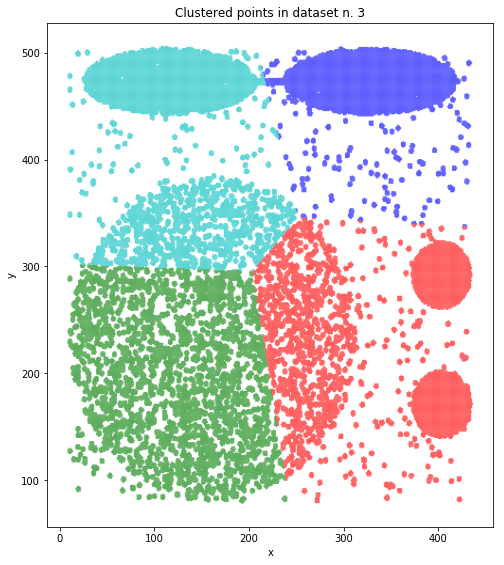

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

# Second part

Funzioni per calcolare wss e bss.

In [42]:
def compute_wss(data, k, n_samples, init = False):
    if init == False:
        kmean = KMeans(n_clusters=k, random_state=0).fit(data)
    else:
        kmean = KMeans(n_clusters=k, random_state=0, init = 'random').fit(data)
    clusters = kmean.cluster_centers_
    wss_value = 0
    for clu in range(k):
        data_class = [data[i,0] for i in range(n_samples) if kmean.labels_[i] == clu] # come visto prima
        for j in range (len(data_class)):
            wss_value = wss_value + ((data_class[j] - clusters[clu][0]) ** 2)
    return wss_value

def compute_bss(data, k, n_samples, init = False):
    if init == False:
        kmean = KMeans(n_clusters=k, random_state=0).fit(data)
    else:
        kmean = KMeans(n_clusters=k, random_state=0, init = 'random').fit(data)
    clusters = kmean.cluster_centers_
    clusters_mean = np.mean(clusters, axis=0)
    bss_value = 0
    for clu in range(k):
        data_class = [data[i,0] for i in range(n_samples) if kmean.labels_[i] == clu]
        bss_value = bss_value + (len(data_class) * ((clusters_mean[0] - clusters[clu][0]) ** 2))
    return bss_value

Esempio di calcolo di wss, bss e sse per il dataset 1.

In [43]:
wss1 = compute_wss(data1, 3, n_samples1)
bss1 = compute_bss(data1, 3, n_samples1)
print("WSS per il Dataset1, usando k = 3 è: " + str(wss1))
print("BSS per il Dataset1, usando k = 3 è: " + str(bss1))
print("SSE per il Dataset1, usando k = 3 è: " + str(wss1 + bss1))

WSS per il Dataset1, usando k = 3 è: 31262.5
BSS per il Dataset1, usando k = 3 è: 314414.9999999995
SSE per il Dataset1, usando k = 3 è: 345677.4999999995


Esempio di calcolo di wss, bss e sse per il dataset 2.

In [44]:
wss2 = compute_wss(data2, 4, n_samples2)
bss2 = compute_bss(data2, 4, n_samples2)
print("WSS per il Dataset2, usando k = 4 è: " + str(wss2))
print("BSS per il Dataset2, usando k = 4 è: " + str(bss2))
print("SSE per il Dataset2, usando k = 4 è: " + str(wss2 + bss2))

WSS per il Dataset2, usando k = 4 è: 1159944.1680504924
BSS per il Dataset2, usando k = 4 è: 5149824.9441747125
SSE per il Dataset2, usando k = 4 è: 6309769.112225205


Esempio di calcolo di wss, bss e sse per il dataset 3.

In [45]:
wss3 = compute_wss(data3, 4, n_samples3)
bss3 = compute_bss(data3, 4, n_samples3)
print("WSS per il Dataset2, usando k = 4 è: " + str(wss3))
print("BSS per il Dataset2, usando k = 4 è: " + str(bss3))
print("SSE per il Dataset2, usando k = 4 è: " + str(wss3 + bss3))

WSS per il Dataset2, usando k = 4 è: 311643769.22013986
BSS per il Dataset2, usando k = 4 è: 822224578.592761
SSE per il Dataset2, usando k = 4 è: 1133868347.812901


Eseguo 10 esecuzioni di kmeans cambiando l'inizializzazione dei centroidi e cerco quello che lo minimizza sul dataset 1.
In realtà su KMeans viene riportato per il parametro n_init:
"Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia."
Di default questo valore è 10, quindi con
KMeans(n_clusters=k, random_state=0, init = 'random').fit(data)
viene eseguito dieci volte consecutive KMeans e viene scelto come output quello che minimizza wss.

('WSS: ', array([31262.5, 31262.5, 31262.5, 31262.5, 31262.5, 31262.5, 31262.5,
       31262.5, 31262.5, 31262.5]))
('BSS: ', array([314415., 314415., 314415., 314415., 314415., 314415., 314415.,
       314415., 314415., 314415.]))
('SSE: ', array([345677.5, 345677.5, 345677.5, 345677.5, 345677.5, 345677.5,
       345677.5, 345677.5, 345677.5, 345677.5]))
Il valore minimo wss è: 31262.5 con indice: 0


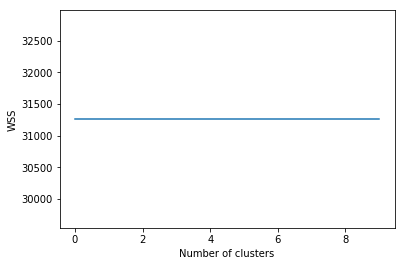

In [55]:
wss4 = np.zeros(10) # minimizzare wss (compatezza)
bss4 = np.zeros(10) # massimizzare bss (separazione tra clusters)
sse4 = np.zeros(10) # il valore sse rimane costante
for i in range(1, 11):
    wss4[i - 1] = compute_wss(data1, 3, n_samples1, True)
for i in range(1, 11):
    bss4[i - 1] = compute_bss(data1, 3, n_samples1, True)
sse4 = wss4 + bss4

print("WSS: ", wss4)
print("BSS: ", bss4)
print("SSE: ", sse4)

wss_min_value1 = wss4.min(axis=0)
wss_min_index1 = wss4.argmin(axis=0)
print("Il valore minimo wss è: " + str(wss_min_value1) + " con indice: " + str(wss_min_index1))

value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure()
plt.plot(wss4)
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()

Eseguo 10 esecuzioni di kmeans cambiando l'inizializzazione dei centroidi e cerco quello che lo minimizza sul dataset 2.

('WSS: ', array([1162246.22886477, 1162246.22886477, 1162246.22886477,
       1162246.22886477, 1162246.22886477, 1162246.22886477,
       1162246.22886477, 1162246.22886477, 1162246.22886477,
       1162246.22886477]))
('BSS: ', array([5141379.57368716, 5141379.57368716, 5141379.57368716,
       5141379.57368716, 5141379.57368716, 5141379.57368716,
       5141379.57368716, 5141379.57368716, 5141379.57368716,
       5141379.57368716]))
('SSE: ', array([6303625.80255193, 6303625.80255193, 6303625.80255193,
       6303625.80255193, 6303625.80255193, 6303625.80255193,
       6303625.80255193, 6303625.80255193, 6303625.80255193,
       6303625.80255193]))
Il valore minimo wss è: 1162246.22886477 con indice: 0


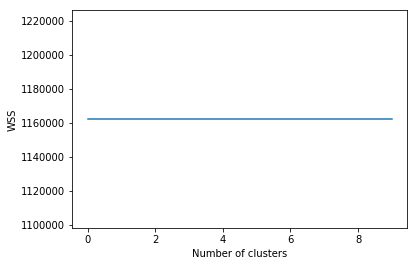

In [56]:
wss5 = np.zeros(10) # minimizzare wss (compatezza)
bss5 = np.zeros(10) # massimizzare bss (separazione tra clusters)
sse5 = np.zeros(10) # il valore sse rimane costante
for i in range(1, 11):
    wss5[i - 1] = compute_wss(data2, 4, n_samples2, True)
for i in range(1, 11):
    bss5[i - 1] = compute_bss(data2, 4, n_samples2, True)
sse5 = wss5 + bss5

print("WSS: ", wss5)
print("BSS: ", bss5)
print("SSE: ", sse5)

wss_min_value2 = wss5.min(axis=0)
wss_min_index2 = wss5.argmin(axis=0)
print("Il valore minimo wss è: " + str(wss_min_value2) + " con indice: " + str(wss_min_index2))

value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure()
plt.plot(wss5)
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()

Eseguo 10 esecuzioni di kmeans cambiando l'inizializzazione dei centroidi e cerco quello che lo minimizza sul dataset 3.

('WSS: ', array([3.11669575e+08, 3.11669575e+08, 3.11669575e+08, 3.11669575e+08,
       3.11669575e+08, 3.11669575e+08, 3.11669575e+08, 3.11669575e+08,
       3.11669575e+08, 3.11669575e+08]))
('BSS: ', array([8.2269796e+08, 8.2269796e+08, 8.2269796e+08, 8.2269796e+08,
       8.2269796e+08, 8.2269796e+08, 8.2269796e+08, 8.2269796e+08,
       8.2269796e+08, 8.2269796e+08]))
('SSE: ', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))
Il valore minimo wss è: 311669575.4412646 con indice: 0


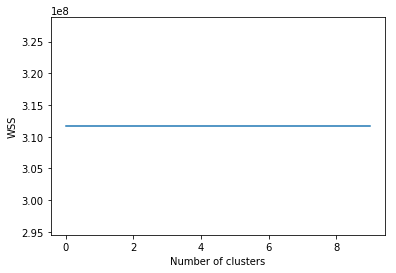

In [57]:
wss6 = np.zeros(10) # minimizzare wss (compatezza)
bss6 = np.zeros(10) # massimizzare bss (separazione tra clusters)
sse6 = np.zeros(10) # il valore sse rimane costante
for i in range(1, 11):
    wss6[i - 1] = compute_wss(data3, 4, n_samples3, True)
for i in range(1, 11):
    bss6[i - 1] = compute_bss(data3, 4, n_samples3, True)
sse5 = wss6 + bss6

print("WSS: ", wss6)
print("BSS: ", bss6)
print("SSE: ", sse6)

wss_min_value3 = wss6.min(axis=0)
wss_min_index3 = wss6.argmin(axis=0)
print("Il valore minimo wss è: " + str(wss_min_value3) + " con indice: " + str(wss_min_index3))

value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure()
plt.plot(wss6)
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()

Sklearn fornisce il modo di calcolare WSS.

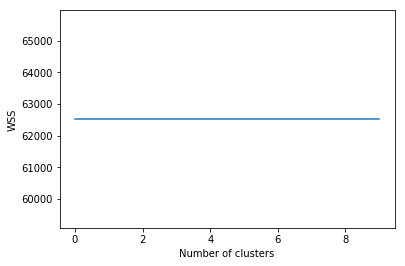

[62525. 62525. 62525. 62525. 62525. 62525. 62525. 62525. 62525. 62525.]


In [34]:
# https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html

value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
wss7 = np.zeros(10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = 3, random_state=0, init = 'random').fit(data1)
    wss7[i - 1] = kmeans.inertia_
plt.figure()
plt.plot(wss7)
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()
print(wss7)

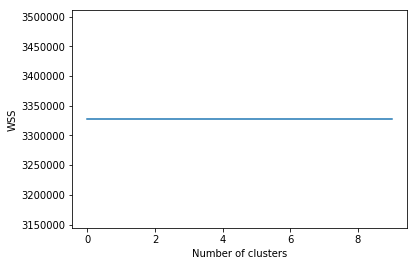

[3327509.43678786 3327509.43678786 3327509.43678786 3327509.43678786
 3327509.43678786 3327509.43678786 3327509.43678786 3327509.43678786
 3327509.43678786 3327509.43678786]


In [35]:
value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
wss8 = np.zeros(10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = 3, random_state=0, init = 'random').fit(data2)
    wss8[i - 1] = kmeans.inertia_
plt.figure()
plt.plot(wss8)
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()
print(wss8)

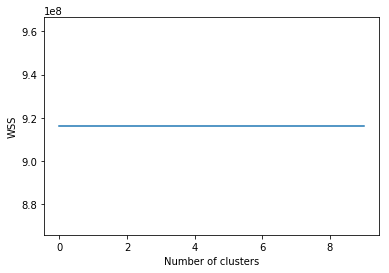

[9.16137153e+08 9.16137153e+08 9.16137153e+08 9.16137153e+08
 9.16137153e+08 9.16137153e+08 9.16137153e+08 9.16137153e+08
 9.16137153e+08 9.16137153e+08]


In [36]:
value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
wss9 = np.zeros(10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = 3, random_state=0, init = 'random').fit(data3)
    wss9[i - 1] = kmeans.inertia_
plt.figure()
plt.plot(wss9)
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()
print(wss9)

Funzione per il calcola del migliore k.

Tune the value of K for K-means in terms of sum of the clusters cohesion (WSSE) 

In [49]:
def compute_best_k(data, n_samples):
    metric = np.zeros(shape=(10,3))
    for k in range(1, 11):
        WSS = compute_wss(data, k, n_samples)
        BSS = compute_bss(data, k, n_samples)
        SSE = WSS + BSS
        metric[k - 1] = [WSS, BSS, SSE]
    wss_min_value = metric.min(axis=0)[0]
    wss_min_index = metric.argmin(axis=0)[0]
    bss_max_value = metric.max(axis=0)[1]
    bss_max_index = metric.argmax(axis=0)[1]
    sse_min_value = metric.min(axis=0)[2]
    sse_min_index = metric.argmin(axis=0)[2]
    print("Min value per WSS è: " + str(wss_min_value) + " con k = " + str(wss_min_index+1))
    print("Max value per BSS è: " + str(bss_max_value) + " con k = " + str(bss_max_index))
    print(metric)

Calcolo sul dataset 1 del miglior k.

In [50]:
compute_best_k(data1, n_samples1)

Min value per WSS e': 2945.5 con k = 10
Max value per BSS e': 349450.9999999995 con k = 4
[[345595.36            0.         345595.36      ]
 [ 72674.75247525 310199.72061563 382874.47309087]
 [ 31262.5        314415.         345677.5       ]
 [ 22975.         343365.         366340.        ]
 [ 15162.5        349451.         364613.5       ]
 [  7812.5        337865.         345677.5       ]
 [  6282.5        346023.40816327 352305.90816327]
 [  4928.5        341505.84375    346434.34375   ]
 [  3476.5        342131.96296296 345608.46296296]
 [  2945.5        345122.4        348067.9       ]]


Calcolo sul dataset 2 del miglior k.

In [51]:
compute_best_k(data2, n_samples2)

Min value per WSS e': 357695.9231562594 con k = 10
Max value per BSS e': 6026102.080539535 con k = 5
[[6313878.86253646       0.         6313878.86253646]
 [3454119.4720837  3030953.63535067 6485073.10743438]
 [1780456.67839488 4700515.43261667 6480972.11101155]
 [1159944.16805049 5149824.94417471 6309769.1122252 ]
 [1095682.40324102 5574215.18470753 6669897.58794856]
 [ 658184.28943018 6026102.08053953 6684286.36996971]
 [ 636213.44521419 5777763.70465523 6413977.14986942]
 [ 503432.03672673 5809725.40146792 6313157.43819465]
 [ 474164.29357774 5839566.64626648 6313730.93984422]
 [ 357695.92315626 5961455.93839716 6319151.86155341]]


Calcolo sul dataset 3 del miglior k.

In [52]:
compute_best_k(data3, n_samples3)

Min value per WSS e': 119456158.14528215 con k = 10
Max value per BSS e': 1022141919.8813703 con k = 9
[[1.10022370e+09 0.00000000e+00 1.10022370e+09]
 [1.03145438e+09 7.13582897e+07 1.10281267e+09]
 [5.44912446e+08 5.73805082e+08 1.11871753e+09]
 [3.11643769e+08 8.22224579e+08 1.13386835e+09]
 [3.18087898e+08 7.84814246e+08 1.10290214e+09]
 [1.91482847e+08 9.16821901e+08 1.10830475e+09]
 [1.61696458e+08 9.42525121e+08 1.10422158e+09]
 [1.57544767e+08 9.99256077e+08 1.15680084e+09]
 [1.40022503e+08 9.98694639e+08 1.13871714e+09]
 [1.19456158e+08 1.02214192e+09 1.14159808e+09]]


Funzione per l'individuazione dei clusters con DBSCAN.

In [85]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

def compute_dbscan(eps_, min_samples_, data):
    db = DBSCAN(eps=eps_, min_samples=min_samples_).fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    silhouette_coefficient = metrics.silhouette_score(data, labels)
    print("Silhouette Coefficient: %0.3f" % silhouette_coefficient)
    print(labels)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    return silhouette_coefficient

Estimated number of clusters: 3
Silhouette Coefficient: 0.723
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


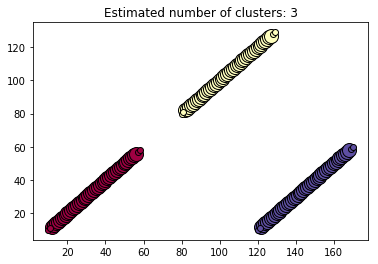

In [94]:
silhouette_coefficient1 = compute_dbscan(2.9, 5, data1)

Estimated number of clusters: 4
Silhouette Coefficient: 0.002
[0 0 0 ... 2 2 2]


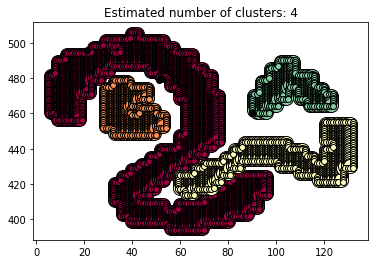

In [95]:
silhouette_coefficient2 = compute_dbscan(1.5, 8, data2)

In [96]:
silhouette_coefficient3 = compute_dbscan(3, 5, data3)

Estimated number of clusters: 191


MemoryError: 

Tune the values of the parameters eps and minpts for DBSCAN by finding the optimal pair of values. How to evaluate the optimal combination? 

In [97]:
def tune_eps(data, n_neighbors, n_samples):
    from sklearn import neighbors
    nn = neighbors.NearestNeighbors(n_neighbors).fit(data)
    distances, indices = nn.kneighbors(data)
    distanceDec = sorted(distances[:,n_neighbors-1], reverse=True)
    plt.plot(list(range(1,n_samples+1)), distanceDec)
    print("Min value: " + str(min(distanceDec)))

Min value: 2.8284271247461903


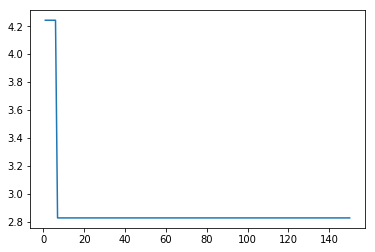

In [98]:
tune_eps(data1, 4, n_samples1)

Min value: 1.0


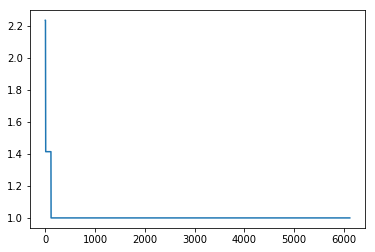

In [99]:
tune_eps(data2, 4, n_samples2)

Min value: 1.0


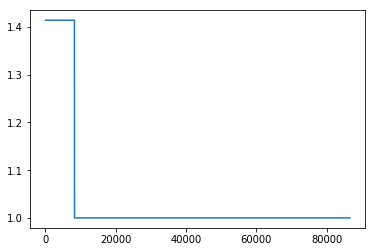

In [100]:
tune_eps(data3, 4, n_samples3)

Compare the results of K-means and DBSCAN 

Dataset 1

In [104]:
print("Silhouette score con kmeans: " + str(metrics.silhouette_score(data1, kmeans1.labels_)))
print("Silhouette score con DBSCAN: " + str(silhouette_coefficient1))

Silhouette score con kmeans: 0.7229402453727759
Silhouette score con DBSCAN: 0.7229402453727759


Dataset 2

In [106]:
print("Silhouette score con kmeans: " + str(metrics.silhouette_score(data2, kmeans2.labels_)))
print("Silhouette score con DBSCAN: " + str(silhouette_coefficient2))

Silhouette score con kmeans: 0.41675746111320705
Silhouette score con DBSCAN: 0.0019239624894802426


Dataset 3

In [107]:
print("Silhouette score con kmeans: " + str(metrics.silhouette_score(data3, kmeans3.labels_)))
print("Silhouette score con DBSCAN: " + str(silhouette_coefficient3))

MemoryError: 